<a href="https://colab.research.google.com/github/Nnalue-Emeka/Deendata/blob/main/Statistical_Analysis_of_UK_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages(c("readr", "purrr"))
library(readr)
library(purrr)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("tidyverse")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ stringr   1.5.1
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ ggplot2   3.5.1     ✔ tidyr     1.3.1
✔ lubridate 1.9.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:

url7 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2013-part1.csv"
url8 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2013-part2.csv"
url9 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2014-part1.csv"
url10 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2014-part2.csv"
url11 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2015-part1.csv"
url12 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2015-part2.csv"
url13 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2016-part1.csv"
url14 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2016-part2.csv"
url15 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2017-part1.csv"
url16 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2017-part2.csv"
url17 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2018.csv"
url18 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2019.csv"
url19 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2020.csv"
url20 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2021.csv"
url21 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2022.csv"
url22 <- "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2023.csv"

In [ ]:
urls <- c( url7, url8, url9,url10, url11, url12,url13,url14, url15, url16, url17, url18, url19,url20, url21, url22)

In [ ]:
# This function reads a CSV from a URL
read_csv_url <- function(url) {
  temp_file <- tempfile()
  download.file(url, temp_file, mode = "wb")
  data <- read_csv(temp_file, col_names = FALSE)
  unlink(temp_file)  # Remove the temporary file
  return(data)
}

# Use map to apply the function over each URL
list_of_dataframes <- map(urls, read_csv_url)

Rows: 405521 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): X1, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16
dbl   (1): X2
dttm  (1): X3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 405521 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): X1, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16
dbl   (1): X2
dttm  (1): X3

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 492466 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (14): X1, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16
dbl   (1): X2
dttm  (1): X3

ℹ Use `spec()` to retri

In [ ]:
df1 <- bind_rows(list_of_dataframes)

In [ ]:
head(df1)

X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16
<chr>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
{AF8A3AFB-940A-4FB6-B8BC-8DC69843B14E},975000,2013-03-15,SE22 8UR,T,N,F,168,NA,WOODWARDE ROAD,DULWICH,LONDON,SOUTHWARK,GREATER LONDON,A,A
{170B6EC9-8191-42BB-A389-831E1596BE95},250000,2013-04-12,PE38 9WB,D,N,F,30,NA,CORIANDER ROAD,NA,DOWNHAM MARKET,KING'S LYNN AND WEST NORFOLK,NORFOLK,A,A
{D312D296-8D71-4513-B356-831E2A06ADD4},132000,2013-09-06,TA5 2GL,T,Y,F,1,NA,ANGELICA DRIVE,NORTH PETHERTON,BRIDGWATER,SEDGEMOOR,SOMERSET,A,A
{F12996A5-1F89-44C1-AE59-9160AD54F7AA},237000,2013-02-18,RH16 4PE,S,N,F,19,NA,SUNNYWOOD DRIVE,NA,HAYWARDS HEATH,MID SUSSEX,WEST SUSSEX,A,A
{7C68E2C2-B5C7-4D29-8E39-9160C80CBAAA},227500,2013-05-16,CB6 2SN,S,N,F,52,NA,ELY ROAD,LITTLE DOWNHAM,ELY,EAST CAMBRIDGESHIRE,CAMBRIDGESHIRE,A,A
{C84BA3FF-59A8-4ADC-86AE-8A2B979FEB8E},153000,2013-11-07,ME1 2LJ,T,N,F,48,NA,MARLEY WAY,NA,ROCHESTER,MEDWAY,MEDWAY,A,A


In [ ]:
summary(df1)

      X1                  X2                  X3                        
 Length:11024402    Min.   :        1   Min.   :2013-01-01 00:00:00.00  
 Class :character   1st Qu.:   147000   1st Qu.:2015-12-14 00:00:00.00  
 Mode  :character   Median :   230000   Median :2018-08-09 00:00:00.00  
                    Mean   :   345514   Mean   :2018-08-06 16:30:41.31  
                    3rd Qu.:   362500   3rd Qu.:2021-04-22 00:00:00.00  
                    Max.   :900000000   Max.   :2023-12-31 00:00:00.00  
      X4                 X5                 X6                 X7           
 Length:11024402    Length:11024402    Length:11024402    Length:11024402   
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

In [ ]:
library(data.table)


Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose




In [ ]:

# Assign column names
colnames(df1) <- c("unique_id", "price_paid", "deed_date", "postcode", "property_type", "new_build", "estate_type", "r1", "r2","street", "locality", "town", "district", "county", "r3", "r4")
head(df1)

unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,r1,r2,street,locality,town,district,county,r3,r4
<chr>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
{AF8A3AFB-940A-4FB6-B8BC-8DC69843B14E},975000,2013-03-15,SE22 8UR,T,N,F,168,NA,WOODWARDE ROAD,DULWICH,LONDON,SOUTHWARK,GREATER LONDON,A,A
{170B6EC9-8191-42BB-A389-831E1596BE95},250000,2013-04-12,PE38 9WB,D,N,F,30,NA,CORIANDER ROAD,NA,DOWNHAM MARKET,KING'S LYNN AND WEST NORFOLK,NORFOLK,A,A
{D312D296-8D71-4513-B356-831E2A06ADD4},132000,2013-09-06,TA5 2GL,T,Y,F,1,NA,ANGELICA DRIVE,NORTH PETHERTON,BRIDGWATER,SEDGEMOOR,SOMERSET,A,A
{F12996A5-1F89-44C1-AE59-9160AD54F7AA},237000,2013-02-18,RH16 4PE,S,N,F,19,NA,SUNNYWOOD DRIVE,NA,HAYWARDS HEATH,MID SUSSEX,WEST SUSSEX,A,A
{7C68E2C2-B5C7-4D29-8E39-9160C80CBAAA},227500,2013-05-16,CB6 2SN,S,N,F,52,NA,ELY ROAD,LITTLE DOWNHAM,ELY,EAST CAMBRIDGESHIRE,CAMBRIDGESHIRE,A,A
{C84BA3FF-59A8-4ADC-86AE-8A2B979FEB8E},153000,2013-11-07,ME1 2LJ,T,N,F,48,NA,MARLEY WAY,NA,ROCHESTER,MEDWAY,MEDWAY,A,A


In [ ]:
# Remove redundant columns
df1 <- df1 %>% select(-r1, -r2, -r3, -r4)

In [ ]:
summary(df1)

  unique_id           price_paid          deed_date                     
 Length:11024402    Min.   :        1   Min.   :2013-01-01 00:00:00.00  
 Class :character   1st Qu.:   147000   1st Qu.:2015-12-14 00:00:00.00  
 Mode  :character   Median :   230000   Median :2018-08-09 00:00:00.00  
                    Mean   :   345514   Mean   :2018-08-06 16:30:41.31  
                    3rd Qu.:   362500   3rd Qu.:2021-04-22 00:00:00.00  
                    Max.   :900000000   Max.   :2023-12-31 00:00:00.00  
   postcode         property_type       new_build         estate_type       
 Length:11024402    Length:11024402    Length:11024402    Length:11024402   
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

In [ ]:
# Create a copy of df
df_c <- df1 %>% as_tibble()

In [ ]:
# Get unique values
unique_values <- df1 %>% distinct(county) %>% pull(county)

# Print the result
print(unique_values)

  [1] "CITY OF PETERBOROUGH"               
  [2] "ESSEX"                              
  [3] "CHESHIRE EAST"                      
  [4] "LEICESTERSHIRE"                     
  [5] "DEVON"                              
  [6] "GREATER LONDON"                     
  [7] "WARWICKSHIRE"                       
  [8] "SHROPSHIRE"                         
  [9] "KENT"                               
 [10] "NOTTINGHAMSHIRE"                    
 [11] "BEDFORD"                            
 [12] "LINCOLNSHIRE"                       
 [13] "STAFFORDSHIRE"                      
 [14] "WINDSOR AND MAIDENHEAD"             
 [15] "NORTH LINCOLNSHIRE"                 
 [16] "WREXHAM"                            
 [17] "NORFOLK"                            
 [18] "HERTFORDSHIRE"                      
 [19] "CITY OF NOTTINGHAM"                 
 [20] "OXFORDSHIRE"                        
 [21] "WEST SUSSEX"                        
 [22] "SWANSEA"                            
 [23] "NORTHAMPTONSHIRE"        

In [ ]:
# Assigning regions based on county names
df1 <- df1 %>%
  mutate(Region = case_when(
    county %in% c("CITY OF DERBY","CITY OF NOTTINGHAM","DERBYSHIRE","LEICESTER","LEICESTERSHIRE","LINCOLNSHIRE","NORTH EAST LINCOLNSHIRE","NORTH LINCOLNSHIRE","NORTH NORTHAMPTONSHIRE","NORTHAMPTONSHIRE","NOTTINGHAMSHIRE","RUTLAND","WEST NORTHAMPTONSHIRE") ~ "East Midlands England",
    county %in% c("BEDFORD","CAMBRIDGESHIRE","CENTRAL BEDFORDSHIRE","CITY OF PETERBOROUGH","ESSEX","HERTFORDSHIRE","LUTON","NORFOLK","SOUTHEND-ON-SEA","SUFFOLK","THURROCK") ~ "East of England",
    county %in% c("COUNTY DURHAM","DARLINGTON","HARTLEPOOL","MIDDLESBROUGH","NORTHUMBERLAND","REDCAR AND CLEVELAND","STOCKTON-ON-TEES","TYNE AND WEAR") ~ "North East England",
    county == "GREATER LONDON" ~ "London",
    county %in% c("BLACKBURN WITH DARWEN","BLACKPOOL","CHESHIRE EAST","CHESHIRE WEST AND CHESTER","CUMBERLAND","CUMBRIA","GREATER MANCHESTER","HALTON","LANCASHIRE","MERSEYSIDE","WARRINGTON","WESTMORLAND AND FURNESS") ~ "North West England",
    county %in% c("BRACKNELL FOREST","BRIGHTON AND HOVE","BUCKINGHAMSHIRE","EAST SUSSEX","HAMPSHIRE","ISLE OF WIGHT","KENT","MEDWAY","MILTON KEYNES","OXFORDSHIRE","PORTSMOUTH","READING","SLOUGH","SOUTHAMPTON","SURREY","WEST BERKSHIRE","WEST SUSSEX","WINDSOR AND MAIDENHEAD","WOKINGHAM") ~ "South East England",
    county %in% c("BATH AND NORTH EAST SOMERSET","BOURNEMOUTH","BOURNEMOUTH, CHRISTCHURCH AND POOLE","CITY OF BRISTOL","CITY OF PLYMOUTH","CORNWALL","DEVON","DORSET","GLOUCESTERSHIRE","ISLES OF SCILLY","NORTH SOMERSET","POOLE","SOMERSET","SOUTH GLOUCESTERSHIRE","SWINDON","TORBAY","WILTSHIRE") ~ "South West England",
    county %in% c("BLAENAU GWENT","BRIDGEND","CAERPHILLY","CARDIFF","CARMARTHENSHIRE","CEREDIGION","CONWY","DENBIGHSHIRE","FLINTSHIRE","GWYNEDD","ISLE OF ANGLESEY","MERTHYR TYDFIL","MONMOUTHSHIRE","NEATH PORT TALBOT","NEWPORT","PEMBROKESHIRE","POWYS","RHONDDA CYNON TAFF","SWANSEA","THE VALE OF GLAMORGAN","TORFAEN","WREXHAM") ~ "Wales",
    county %in% c("HEREFORDSHIRE","SHROPSHIRE","STAFFORDSHIRE","STOKE-ON-TRENT","WARWICKSHIRE","WEST MIDLANDS","WORCESTERSHIRE","WREKIN") ~ "West Midlands England",
    county %in% c("CITY OF KINGSTON UPON HULL","EAST RIDING OF YORKSHIRE","NORTH YORKSHIRE","SOUTH YORKSHIRE","WEST YORKSHIRE","YORK") ~ "Yorkshire and The Humber England",
    TRUE ~ "Other"  # Default case
  ))

# View the result
print(df1)

# A tibble: 11,024,402 × 13
   unique_id     price_paid deed_date           postcode property_type new_build
   <chr>              <dbl> <dttm>              <chr>    <chr>         <chr>    
 1 {AF8A3AFB-94…     975000 2013-03-15 00:00:00 SE22 8UR T             N        
 2 {170B6EC9-81…     250000 2013-04-12 00:00:00 PE38 9WB D             N        
 3 {D312D296-8D…     132000 2013-09-06 00:00:00 TA5 2GL  T             Y        
 4 {F12996A5-1F…     237000 2013-02-18 00:00:00 RH16 4PE S             N        
 5 {7C68E2C2-B5…     227500 2013-05-16 00:00:00 CB6 2SN  S             N        
 6 {C84BA3FF-59…     153000 2013-11-07 00:00:00 ME1 2LJ  T             N        
 7 {1622B821-45…     250000 2013-11-29 00:00:00 MK7 7FF  S             Y        
 8 {E9031102-59…     325000 2013-02-15 00:00:00 E14 9WB  F             N        
 9 {3D799073-62…     130000 2013-09-24 00:00:00 M20 2BG  F             N        
10 {5A79E9CF-A2…     268000 2013-04-26 00:00:00 DT4 0ET  S             N        


In [ ]:
head(df1)

unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,street,locality,town,district,county,Region
<chr>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
{AF8A3AFB-940A-4FB6-B8BC-8DC69843B14E},975000,2013-03-15,SE22 8UR,T,N,F,WOODWARDE ROAD,DULWICH,LONDON,SOUTHWARK,GREATER LONDON,London
{170B6EC9-8191-42BB-A389-831E1596BE95},250000,2013-04-12,PE38 9WB,D,N,F,CORIANDER ROAD,NA,DOWNHAM MARKET,KING'S LYNN AND WEST NORFOLK,NORFOLK,East of England
{D312D296-8D71-4513-B356-831E2A06ADD4},132000,2013-09-06,TA5 2GL,T,Y,F,ANGELICA DRIVE,NORTH PETHERTON,BRIDGWATER,SEDGEMOOR,SOMERSET,South West England
{F12996A5-1F89-44C1-AE59-9160AD54F7AA},237000,2013-02-18,RH16 4PE,S,N,F,SUNNYWOOD DRIVE,NA,HAYWARDS HEATH,MID SUSSEX,WEST SUSSEX,South East England
{7C68E2C2-B5C7-4D29-8E39-9160C80CBAAA},227500,2013-05-16,CB6 2SN,S,N,F,ELY ROAD,LITTLE DOWNHAM,ELY,EAST CAMBRIDGESHIRE,CAMBRIDGESHIRE,East of England
{C84BA3FF-59A8-4ADC-86AE-8A2B979FEB8E},153000,2013-11-07,ME1 2LJ,T,N,F,MARLEY WAY,NA,ROCHESTER,MEDWAY,MEDWAY,South East England


In [ ]:
# Get unique values
unique_values <- df1 %>% distinct(Region) %>% pull(Region)

# Print the result
print(unique_values)

 [1] "London"                           "East of England"                 
 [3] "South West England"               "South East England"              
 [5] "North West England"               "North East England"              
 [7] "West Midlands England"            "Wales"                           
 [9] "East Midlands England"            "Yorkshire and The Humber England"


In [ ]:
df1 <- df1 %>%
  mutate(Country = case_when(
    Region %in% c("East of England", "East Midlands England", "London", "South East England", "Yorkshire and The Humber England", "North West England", "South West England", "West Midlands England", "North East England") ~ "England",
    Region == "Wales" ~ "Wales",
    TRUE ~ "Unknown" # This acts as an else condition
  ))

In [ ]:
summary(df1)

  unique_id           price_paid          deed_date                     
 Length:11024402    Min.   :        1   Min.   :2013-01-01 00:00:00.00  
 Class :character   1st Qu.:   147000   1st Qu.:2015-12-14 00:00:00.00  
 Mode  :character   Median :   230000   Median :2018-08-09 00:00:00.00  
                    Mean   :   345514   Mean   :2018-08-06 16:30:41.31  
                    3rd Qu.:   362500   3rd Qu.:2021-04-22 00:00:00.00  
                    Max.   :900000000   Max.   :2023-12-31 00:00:00.00  
   postcode         property_type       new_build         estate_type       
 Length:11024402    Length:11024402    Length:11024402    Length:11024402   
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

In [ ]:
library(lubridate)

In [ ]:
df1$deed_year <- year(df1$deed_date)

head(df1)

unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,street,locality,town,district,county,Region,Country,deed_year
<chr>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
{AF8A3AFB-940A-4FB6-B8BC-8DC69843B14E},975000,2013-03-15,SE22 8UR,T,N,F,WOODWARDE ROAD,DULWICH,LONDON,SOUTHWARK,GREATER LONDON,London,England,2013
{170B6EC9-8191-42BB-A389-831E1596BE95},250000,2013-04-12,PE38 9WB,D,N,F,CORIANDER ROAD,NA,DOWNHAM MARKET,KING'S LYNN AND WEST NORFOLK,NORFOLK,East of England,England,2013
{D312D296-8D71-4513-B356-831E2A06ADD4},132000,2013-09-06,TA5 2GL,T,Y,F,ANGELICA DRIVE,NORTH PETHERTON,BRIDGWATER,SEDGEMOOR,SOMERSET,South West England,England,2013
{F12996A5-1F89-44C1-AE59-9160AD54F7AA},237000,2013-02-18,RH16 4PE,S,N,F,SUNNYWOOD DRIVE,NA,HAYWARDS HEATH,MID SUSSEX,WEST SUSSEX,South East England,England,2013
{7C68E2C2-B5C7-4D29-8E39-9160C80CBAAA},227500,2013-05-16,CB6 2SN,S,N,F,ELY ROAD,LITTLE DOWNHAM,ELY,EAST CAMBRIDGESHIRE,CAMBRIDGESHIRE,East of England,England,2013
{C84BA3FF-59A8-4ADC-86AE-8A2B979FEB8E},153000,2013-11-07,ME1 2LJ,T,N,F,MARLEY WAY,NA,ROCHESTER,MEDWAY,MEDWAY,South East England,England,2013


In [ ]:
# Remove all duplicates, keeping only the first occurrence
df_f <- df1 %>% distinct()
print(df_f)

# A tibble: 11,024,402 × 15
   unique_id     price_paid deed_date           postcode property_type new_build
   <chr>              <dbl> <dttm>              <chr>    <chr>         <chr>    
 1 {AF8A3AFB-94…     975000 2013-03-15 00:00:00 SE22 8UR T             N        
 2 {170B6EC9-81…     250000 2013-04-12 00:00:00 PE38 9WB D             N        
 3 {D312D296-8D…     132000 2013-09-06 00:00:00 TA5 2GL  T             Y        
 4 {F12996A5-1F…     237000 2013-02-18 00:00:00 RH16 4PE S             N        
 5 {7C68E2C2-B5…     227500 2013-05-16 00:00:00 CB6 2SN  S             N        
 6 {C84BA3FF-59…     153000 2013-11-07 00:00:00 ME1 2LJ  T             N        
 7 {1622B821-45…     250000 2013-11-29 00:00:00 MK7 7FF  S             Y        
 8 {E9031102-59…     325000 2013-02-15 00:00:00 E14 9WB  F             N        
 9 {3D799073-62…     130000 2013-09-24 00:00:00 M20 2BG  F             N        
10 {5A79E9CF-A2…     268000 2013-04-26 00:00:00 DT4 0ET  S             N        


In [ ]:
# Get unique values
unique_values <- df_f %>% distinct(new_build) %>% pull(new_build)

# Print the result
print(unique_values)

[1] "N" "Y"


In [ ]:
# Get unique values
unique_values <- df_f %>% distinct(property_type) %>% pull(property_type)

# Print the result
print(unique_values)

[1] "T" "D" "S" "F" "O"


In [ ]:
# Replace values using recode
df_f <- df_f %>%
  mutate(property_type = recode(property_type, "S" = "SEMI-DETACHED", "T" = "TERRACED", "D" = "DETACHED", "F" = "FLAT/MAISONETTE",  "O" = "OTHER"))

df_f <- df_f %>%
  mutate(estate_type = recode(estate_type, "L" = "LEASEHOLD", "F" = "FREEHOLD"))

df_f <- df_f %>%
  mutate(new_build = recode(new_build, "Y" = "YES", "N" = "NO"))

# View the result
print(df_f)



# A tibble: 11,024,402 × 15
   unique_id     price_paid deed_date           postcode property_type new_build
   <chr>              <dbl> <dttm>              <chr>    <chr>         <chr>    
 1 {AF8A3AFB-94…     975000 2013-03-15 00:00:00 SE22 8UR TERRACED      NO       
 2 {170B6EC9-81…     250000 2013-04-12 00:00:00 PE38 9WB DETACHED      NO       
 3 {D312D296-8D…     132000 2013-09-06 00:00:00 TA5 2GL  TERRACED      YES      
 4 {F12996A5-1F…     237000 2013-02-18 00:00:00 RH16 4PE SEMI-DETACHED NO       
 5 {7C68E2C2-B5…     227500 2013-05-16 00:00:00 CB6 2SN  SEMI-DETACHED NO       
 6 {C84BA3FF-59…     153000 2013-11-07 00:00:00 ME1 2LJ  TERRACED      NO       
 7 {1622B821-45…     250000 2013-11-29 00:00:00 MK7 7FF  SEMI-DETACHED YES      
 8 {E9031102-59…     325000 2013-02-15 00:00:00 E14 9WB  FLAT/MAISONE… NO       
 9 {3D799073-62…     130000 2013-09-24 00:00:00 M20 2BG  FLAT/MAISONE… NO       
10 {5A79E9CF-A2…     268000 2013-04-26 00:00:00 DT4 0ET  SEMI-DETACHED NO       


In [ ]:
head(df1)

unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,street,locality,town,district,county,Region,Country,deed_year
<chr>,<dbl>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
{AF8A3AFB-940A-4FB6-B8BC-8DC69843B14E},975000,2013-03-15,SE22 8UR,T,N,F,WOODWARDE ROAD,DULWICH,LONDON,SOUTHWARK,GREATER LONDON,London,England,2013
{170B6EC9-8191-42BB-A389-831E1596BE95},250000,2013-04-12,PE38 9WB,D,N,F,CORIANDER ROAD,NA,DOWNHAM MARKET,KING'S LYNN AND WEST NORFOLK,NORFOLK,East of England,England,2013
{D312D296-8D71-4513-B356-831E2A06ADD4},132000,2013-09-06,TA5 2GL,T,Y,F,ANGELICA DRIVE,NORTH PETHERTON,BRIDGWATER,SEDGEMOOR,SOMERSET,South West England,England,2013
{F12996A5-1F89-44C1-AE59-9160AD54F7AA},237000,2013-02-18,RH16 4PE,S,N,F,SUNNYWOOD DRIVE,NA,HAYWARDS HEATH,MID SUSSEX,WEST SUSSEX,South East England,England,2013
{7C68E2C2-B5C7-4D29-8E39-9160C80CBAAA},227500,2013-05-16,CB6 2SN,S,N,F,ELY ROAD,LITTLE DOWNHAM,ELY,EAST CAMBRIDGESHIRE,CAMBRIDGESHIRE,East of England,England,2013
{C84BA3FF-59A8-4ADC-86AE-8A2B979FEB8E},153000,2013-11-07,ME1 2LJ,T,N,F,MARLEY WAY,NA,ROCHESTER,MEDWAY,MEDWAY,South East England,England,2013


In [ ]:
# Summarize missing values by column
df_f %>%
  summarise(across(everything(), ~sum(is.na(.))))

unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,street,locality,town,district,county,Region,Country,deed_year
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,34840,0,0,0,193740,6899951,0,0,0,0,0,0


In [ ]:
# Check for missing values
df_f %>%
  summarise(
    missing_price = sum(is.na(price_paid)),
    missing_date = sum(is.na(deed_date)),
    missing_prot = sum(is.na(property_type)),
    missing_NB = sum(is.na(new_build)),
    missing_ET = sum(is.na(estate_type)),
    missing_C = sum(is.na(county)),
    missing_R = sum(is.na(Region)),
  )


missing_price,missing_date,missing_prot,missing_NB,missing_ET,missing_C,missing_R
<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0


In [ ]:
# Delete rows with any missing values in the specified columns

columns_to_check <- c("price_paid", "deed_date", "property_type", "new_build", "estate_type", "county", "district", "Region")

df_f <- df_f %>%
  filter(if_all(all_of(columns_to_check), ~!is.na(.)))

# View the result
print(df_f)

# A tibble: 11,024,402 × 15
   unique_id     price_paid deed_date           postcode property_type new_build
   <chr>              <dbl> <dttm>              <chr>    <chr>         <chr>    
 1 {AF8A3AFB-94…     975000 2013-03-15 00:00:00 SE22 8UR TERRACED      NO       
 2 {170B6EC9-81…     250000 2013-04-12 00:00:00 PE38 9WB DETACHED      NO       
 3 {D312D296-8D…     132000 2013-09-06 00:00:00 TA5 2GL  TERRACED      YES      
 4 {F12996A5-1F…     237000 2013-02-18 00:00:00 RH16 4PE SEMI-DETACHED NO       
 5 {7C68E2C2-B5…     227500 2013-05-16 00:00:00 CB6 2SN  SEMI-DETACHED NO       
 6 {C84BA3FF-59…     153000 2013-11-07 00:00:00 ME1 2LJ  TERRACED      NO       
 7 {1622B821-45…     250000 2013-11-29 00:00:00 MK7 7FF  SEMI-DETACHED YES      
 8 {E9031102-59…     325000 2013-02-15 00:00:00 E14 9WB  FLAT/MAISONE… NO       
 9 {3D799073-62…     130000 2013-09-24 00:00:00 M20 2BG  FLAT/MAISONE… NO       
10 {5A79E9CF-A2…     268000 2013-04-26 00:00:00 DT4 0ET  SEMI-DETACHED NO       


In [ ]:
# Count rows where price is 0
count_zero_price <- df_f %>%
  summarise(count = sum(price_paid == 0))

# View the result
print(count_zero_price)

# A tibble: 1 × 1
  count
  <int>
1     0


In [ ]:
# Top 10 lowest prices
lowest_prices <- df_f %>%
  slice_min(price_paid, n = 10)

# Top 10 highest prices
highest_prices <- df_f %>%
  slice_max(price_paid , n = 10)

# View the results
print("Top 10 Lowest Prices:")
print(lowest_prices)

print("Top 10 Highest Prices:")
print(highest_prices)

[1] "Top 10 Lowest Prices:"
# A tibble: 548 × 15
   unique_id     price_paid deed_date           postcode property_type new_build
   <chr>              <dbl> <dttm>              <chr>    <chr>         <chr>    
 1 {4E95D757-85…          1 2016-04-01 00:00:00 M6 5GY   TERRACED      NO       
 2 {F3B6C198-B0…          1 2020-01-21 00:00:00 BR5 2EY  FLAT/MAISONE… NO       
 3 {0B853950-A5…          1 2021-09-13 00:00:00 SN4 0FJ  TERRACED      NO       
 4 {1061746E-59…          1 2022-07-04 00:00:00 WS12 2ER TERRACED      NO       
 5 {EC7AD099-99…          1 2022-09-30 00:00:00 SS7 5EJ  TERRACED      NO       
 6 {FFA361DA-E7…          1 2023-06-05 00:00:00 WN8 7AR  SEMI-DETACHED NO       
 7 {68FEB20C-49…        100 2013-12-19 00:00:00 EX16 5DQ OTHER         NO       
 8 {21E5FEB6-92…        100 2014-04-08 00:00:00 SW8 4DS  OTHER         NO       
 9 {87E1551E-DF…        100 2014-11-24 00:00:00 PO2 7PD  OTHER         NO       
10 {21E5FEB6-E2…        100 2014-11-05 00:00:00 W1G 9XF  FLA

In [ ]:

# Load ggplot2
library(ggplot2)

In [ ]:
# Reshape the data
df_long <- df_f %>%
  pivot_longer(cols = c("property_type", "new_build", "estate_type", "Region"),
               names_to = "category", values_to = "category_value")

Warning message:
“The `guide` argument in `scale_*()` cannot be `FALSE`. This was deprecated in
ggplot2 3.3.4.
ℹ Please use "none" instead.”


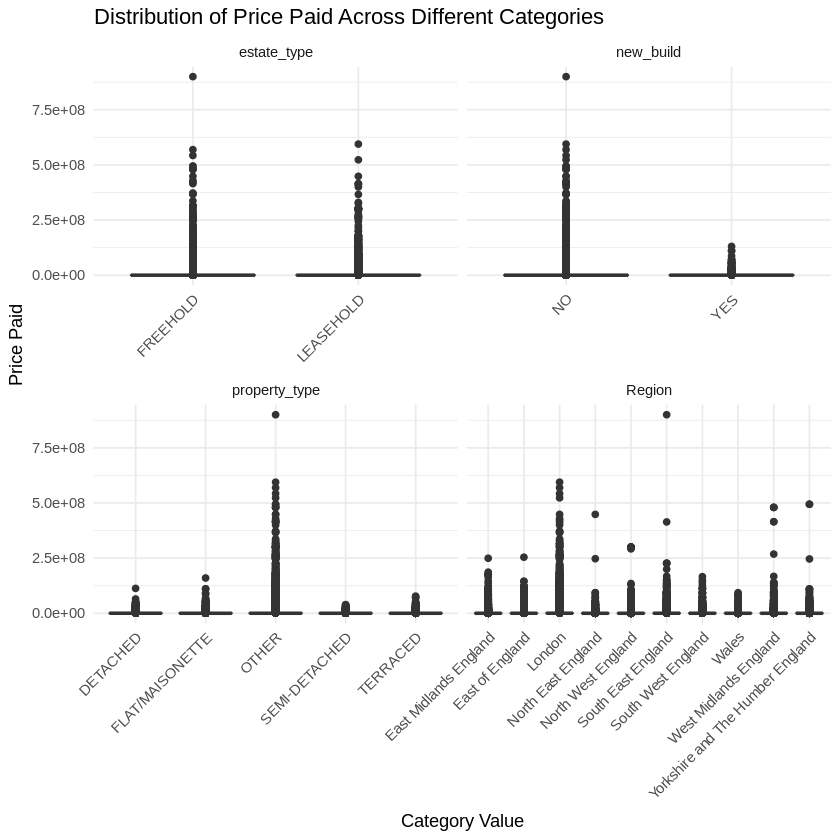

In [ ]:
# Plotting the boxplots
ggplot(df_long, aes(x = category_value, y = price_paid, fill = category_value)) +
  geom_boxplot() +
  facet_wrap(~category, scales = "free_x", ncol = 2) +
  labs(title = "Distribution of Price Paid Across Different Categories",
       x = "Category Value",
       y = "Price Paid") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +  # Rotate x-axis labels for better readability
  scale_fill_discrete(guide = FALSE)  # Remove legend since fill is redundant with x-axis

In [ ]:
# Install gridExtra if not already installed
install.packages("gridExtra")

# Load gridExtra
library(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




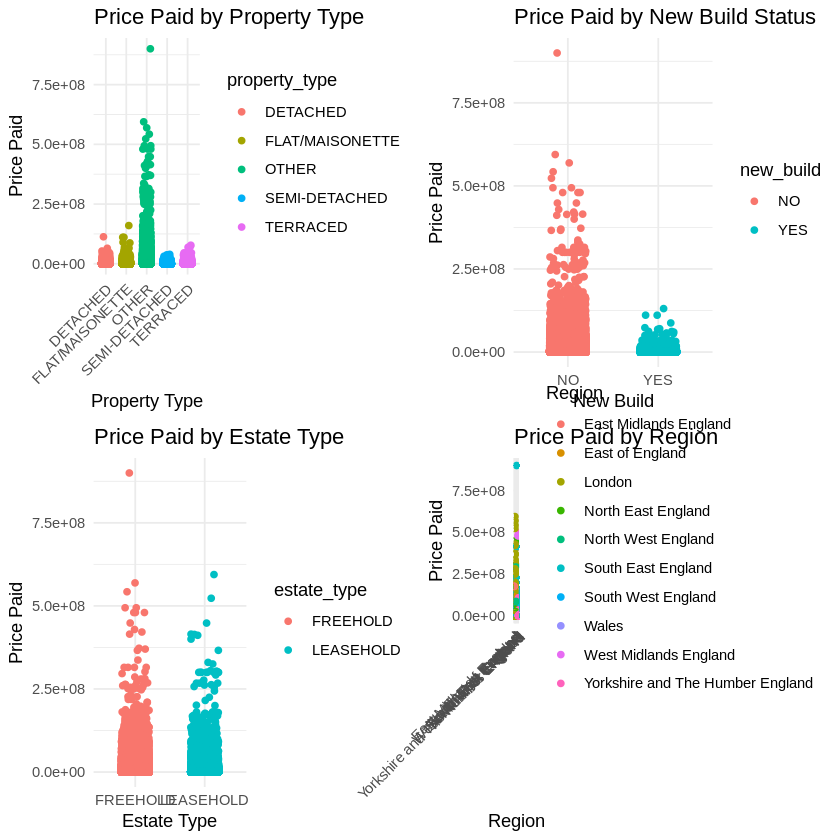

In [ ]:

# For property_type
p2 <- ggplot(df_f, aes(x = property_type, y = price_paid, color = property_type)) +
  geom_point(position = position_jitter(width = 0.2)) +
  labs(title = "Price Paid by Property Type", x = "Property Type", y = "Price Paid") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

# For new_build
p3 <- ggplot(df_f, aes(x = new_build, y = price_paid, color = new_build)) +
  geom_point(position = position_jitter(width = 0.2)) +
  labs(title = "Price Paid by New Build Status", x = "New Build", y = "Price Paid") +
  theme_minimal()

# For estate_type
p4 <- ggplot(df_f, aes(x = estate_type, y = price_paid, color = estate_type)) +
  geom_point(position = position_jitter(width = 0.2)) +
  labs(title = "Price Paid by Estate Type", x = "Estate Type", y = "Price Paid") +
  theme_minimal()

# For Region
p6 <- ggplot(df_f, aes(x = Region, y = price_paid, color = Region)) +
  geom_point(position = position_jitter(width = 0.2)) +
  labs(title = "Price Paid by Region", x = "Region", y = "Price Paid") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


# Displaying the plots
grid.arrange(p2, p3, p4, p6, ncol = 2)

In [ ]:
# Function to perform Shapiro-Wilk test for each group with error checking
perform_shapiro_test <- function(data, group_var, value_var) {
  unique_groups <- unique(data[[group_var]])
  results <- data.frame(Group = character(), W = numeric(), p_value = numeric(), stringsAsFactors = FALSE)

  for (group in unique_groups) {
    group_data <- data[data[[group_var]] == group, value_var]
    if (length(group_data) >= 3) {
      test_result <- shapiro.test(group_data)
      results <- rbind(results, data.frame(
        Group = as.character(group),
        W = test_result$statistic,
        p_value = test_result$p.value
      ))
    } else {
      warning(paste("Group", group, "in", group_var, "has fewer than 3 observations, skipping Shapiro-Wilk test."))
    }
  }

  if (nrow(results) == 0) {
    warning(paste("No groups in", group_var, "had sufficient data for the Shapiro-Wilk test."))
  }

  return(results)
}

# Perform Shapiro-Wilk test for each categorical variable
cat_vars <- c("property_type", "new_build", "estate_type", "Region", "deed_year")

for (var in cat_vars) {
  shapiro_results <- perform_shapiro_test(df_f, var, "price_paid")
  if (nrow(shapiro_results) > 0) {
    print(paste("Shapiro-Wilk Test Results for", var))
    print(shapiro_results)
  } else {
    print(paste("No results for", var, "- Check data or ensure each group has at least 3 observations."))
  }
  cat("\n")
}

Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group SEMI-DETACHED in property_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group TERRACED in property_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group DETACHED in property_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group FLAT/MAISONETTE in property_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group OTHER in property_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“No groups in property_type had sufficient data for the Shapiro-Wilk test.”


[1] "No results for property_type - Check data or ensure each group has at least 3 observations."



Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group NO in new_build has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group YES in new_build has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“No groups in new_build had sufficient data for the Shapiro-Wilk test.”


[1] "No results for new_build - Check data or ensure each group has at least 3 observations."



Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group FREEHOLD in estate_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group LEASEHOLD in estate_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“No groups in estate_type had sufficient data for the Shapiro-Wilk test.”


[1] "No results for estate_type - Check data or ensure each group has at least 3 observations."



Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group East of England in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group North West England in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group East Midlands England in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group South West England in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group London in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group West Midlands England in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_te

[1] "No results for Region - Check data or ensure each group has at least 3 observations."



Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group 2013 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group 2014 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group 2015 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group 2016 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group 2017 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group 2018 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_f, var, "price_paid"):
“Group 2019 in deed_year has

[1] "No results for deed_year - Check data or ensure each group has at least 3 observations."



In [ ]:
# Example of inspecting data distribution
for (var in cat_vars) {
  print(paste("Distribution of", var))
  print(table(df_f[[var]]))
  cat("\n")
}

[1] "Distribution of property_type"

       DETACHED FLAT/MAISONETTE           OTHER   SEMI-DETACHED        TERRACED 
        2557758         2040838          524377         2860628         3027896 

[1] "Distribution of new_build"

     NO     YES 
9770724 1240773 

[1] "Distribution of estate_type"

 FREEHOLD LEASEHOLD 
  8344533   2666964 

[1] "Distribution of Region"

           East Midlands England                  East of England 
                         1017380                          1245455 
                          London               North East England 
                         1285017                           494464 
              North West England               South East England 
                         1388688                          1839015 
              South West England                            Wales 
                         1220221                           555034 
           West Midlands England Yorkshire and The Humber England 
                     

In [ ]:
df_c <- df_f

In [ ]:
# Convert categorical variables to factors
df_c$property_type <- as.factor(df_c$property_type)
df_c$new_build <- as.factor(df_c$new_build)
df_c$estate_type <- as.factor(df_c$estate_type)
df_c$Region <- as.factor(df_c$Region)
df_c$deed_year <- as.factor(df_c$deed_year)

In [ ]:
# Convert categorical variables to factors
df_c$property_type <- as.factor(df_c$property_type)
df_c$new_build <- as.factor(df_c$new_build)
df_c$estate_type <- as.factor(df_c$estate_type)
df_c$Region <- as.factor(df_c$Region)
df_c$deed_year <- as.factor(df_c$deed_year)

# Function to perform Shapiro-Wilk test for each group
perform_shapiro_test <- function(data, group_var, value_var) {
  unique_groups <- levels(data[[group_var]])
  results <- data.frame(Group = character(), W = numeric(), p_value = numeric(), stringsAsFactors = FALSE)

  for (group in unique_groups) {
    group_data <- data[data[[group_var]] == group, value_var]
    if (length(group_data) >= 3) {
      test_result <- shapiro.test(group_data)
      results <- rbind(results, data.frame(
        Group = as.character(group),
        W = test_result$statistic,
        p_value = test_result$p.value
      ))
    } else {
      warning(paste("Group", group, "in", group_var, "has fewer than 3 observations, skipping Shapiro-Wilk test."))
    }
  }

  if (nrow(results) == 0) {
    warning(paste("No groups in", group_var, "had sufficient data for the Shapiro-Wilk test."))
  }

  return(results)
}

# Perform Shapiro-Wilk test for each categorical variable
cat_vars <- c("property_type", "new_build", "estate_type", "Region", "deed_year")

for (var in cat_vars) {
  shapiro_results <- perform_shapiro_test(df_c, var, "price_paid")
  if (nrow(shapiro_results) > 0) {
    print(paste("Shapiro-Wilk Test Results for", var))
    print(shapiro_results)
  } else {
    print(paste("No results for", var, "- Check data or ensure each group has at least 3 observations."))
  }
  cat("\n")
}

Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group DETACHED in property_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group FLAT/MAISONETTE in property_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group OTHER in property_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group SEMI-DETACHED in property_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group TERRACED in property_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“No groups in property_type had sufficient data for the Shapiro-Wilk test.”


[1] "No results for property_type - Check data or ensure each group has at least 3 observations."



Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group NO in new_build has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group YES in new_build has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“No groups in new_build had sufficient data for the Shapiro-Wilk test.”


[1] "No results for new_build - Check data or ensure each group has at least 3 observations."



Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group FREEHOLD in estate_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group LEASEHOLD in estate_type has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“No groups in estate_type had sufficient data for the Shapiro-Wilk test.”


[1] "No results for estate_type - Check data or ensure each group has at least 3 observations."



Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group East Midlands England in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group East of England in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group London in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group North East England in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group North West England in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group South East England in Region has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(

[1] "No results for Region - Check data or ensure each group has at least 3 observations."



Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group 2013 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group 2014 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group 2015 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group 2016 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group 2017 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group 2018 in deed_year has fewer than 3 observations, skipping Shapiro-Wilk test.”
Warning message in perform_shapiro_test(df_c, var, "price_paid"):
“Group 2019 in deed_year has

[1] "No results for deed_year - Check data or ensure each group has at least 3 observations."



In [ ]:
head(df_c)

unique_id,price_paid,deed_date,postcode,property_type,new_build,estate_type,street,locality,town,district,county,Region,Country,deed_year
<chr>,<dbl>,<dttm>,<chr>,<fct>,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<chr>,<fct>
{14C264CE-A450-4424-B2FC-59BCB8673F31},150000,2013-12-20,PE7 2PP,SEMI-DETACHED,NO,FREEHOLD,WHITTLESEY ROAD,NA,PETERBOROUGH,CITY OF PETERBOROUGH,CITY OF PETERBOROUGH,East of England,England,2013
{CF1B07BD-6D42-41A1-A7E2-52A23BFD3DF1},230000,2013-07-05,EN9 3ED,TERRACED,NO,FREEHOLD,CULLINGS COURT,NA,WALTHAM ABBEY,EPPING FOREST,ESSEX,East of England,England,2013
{B9B46180-204A-43BE-847C-52A25E2593F1},182000,2013-04-15,ST7 2BH,DETACHED,NO,FREEHOLD,STANLEY COURT,ALSAGER,STOKE-ON-TRENT,CHESHIRE EAST,CHESHIRE EAST,North West England,England,2013
{260A3CB9-EFDD-4D5D-B626-562F93B5FF86},185000,2013-08-30,LE9 6QP,DETACHED,NO,FREEHOLD,MERTON CLOSE,BROUGHTON ASTLEY,LEICESTER,HARBOROUGH,LEICESTERSHIRE,East Midlands England,England,2013
{3C08B211-258C-40E4-B430-562F993AA281},265000,2013-12-10,EX14 4XU,DETACHED,NO,FREEHOLD,LOUIS WAY,DUNKESWELL,HONITON,EAST DEVON,DEVON,South West England,England,2013
{94E95BEA-692F-4593-90F5-562FAD7E4063},580000,2013-11-29,NW1 5EL,FLAT/MAISONETTE,NO,LEASEHOLD,TRANSEPT STREET,NA,LONDON,CITY OF WESTMINSTER,GREATER LONDON,London,England,2013


In [ ]:
# Function to perform Kolmogorov-Smirnov test for each group
perform_ks_test <- function(data, group_var, value_var) {
  unique_groups <- levels(data[[group_var]])
  results <- data.frame(Group = character(), D = numeric(), p_value = numeric(), stringsAsFactors = FALSE)

  for (group in unique_groups) {
    group_data <- data[data[[group_var]] == group, value_var]
    if (length(group_data) >= 3) {
      test_result <- ks.test(group_data, "pnorm", mean(group_data), sd(group_data))
      results <- rbind(results, data.frame(
        Group = as.character(group),
        D = test_result$statistic,
        p_value = test_result$p.value
      ))
    } else {
      warning(paste("Group", group, "in", group_var, "has fewer than 3 observations, skipping KS test."))
    }
  }

  if (nrow(results) == 0) {
    warning(paste("No groups in", group_var, "had sufficient data for the KS test."))
  }

  return(results)
}

# Perform KS test for each categorical variable
for (var in cat_vars) {
  ks_results <- perform_ks_test(df_f, var, "price_paid")
  if (nrow(ks_results) > 0) {
    print(paste("Kolmogorov-Smirnov Test Results for", var))
    print(ks_results)
  } else {
    print(paste("No results for", var, "- Check data or ensure each group has at least 3 observations."))
  }
  cat("\n")
}

Warning message in perform_ks_test(df_f, var, "price_paid"):
“No groups in property_type had sufficient data for the KS test.”


[1] "No results for property_type - Check data or ensure each group has at least 3 observations."



Warning message in perform_ks_test(df_f, var, "price_paid"):
“No groups in new_build had sufficient data for the KS test.”


[1] "No results for new_build - Check data or ensure each group has at least 3 observations."



Warning message in perform_ks_test(df_f, var, "price_paid"):
“No groups in estate_type had sufficient data for the KS test.”


[1] "No results for estate_type - Check data or ensure each group has at least 3 observations."



Warning message in perform_ks_test(df_f, var, "price_paid"):
“No groups in Region had sufficient data for the KS test.”


[1] "No results for Region - Check data or ensure each group has at least 3 observations."



Warning message in perform_ks_test(df_f, var, "price_paid"):
“No groups in deed_year had sufficient data for the KS test.”


[1] "No results for deed_year - Check data or ensure each group has at least 3 observations."



In [ ]:
# Function to perform Shapiro-Wilk test for each group
perform_shapiro_test <- function(data, group_var, value_var) {
  unique_groups <- unique(data[[group_var]])
  results <- data.frame()

  for (group in unique_groups) {
    group_data <- data[data[[group_var]] == group, value_var]
    if (length(group_data) >= 3) {
      test_result <- shapiro.test(group_data)
      results <- rbind(results, data.frame(
        Group = group,
        W = test_result$statistic,
        p_value = test_result$p.value
      ))
    }
  }

  return(results)
}

# Perform Shapiro-Wilk test for each categorical variable
cat_vars <- c("property_type", "new_build", "estate_type", "Region", "deed_year")

for (var in cat_vars) {
  shapiro_results <- perform_shapiro_test(df_f, var, "price_paid")
  print(paste("Shapiro-Wilk Test Results for", var))
  print(shapiro_results)
  cat("\n")
}

[1] "Shapiro-Wilk Test Results for property_type"
data frame with 0 columns and 0 rows

[1] "Shapiro-Wilk Test Results for new_build"
data frame with 0 columns and 0 rows

[1] "Shapiro-Wilk Test Results for estate_type"
data frame with 0 columns and 0 rows

[1] "Shapiro-Wilk Test Results for Region"
data frame with 0 columns and 0 rows

[1] "Shapiro-Wilk Test Results for deed_year"
data frame with 0 columns and 0 rows



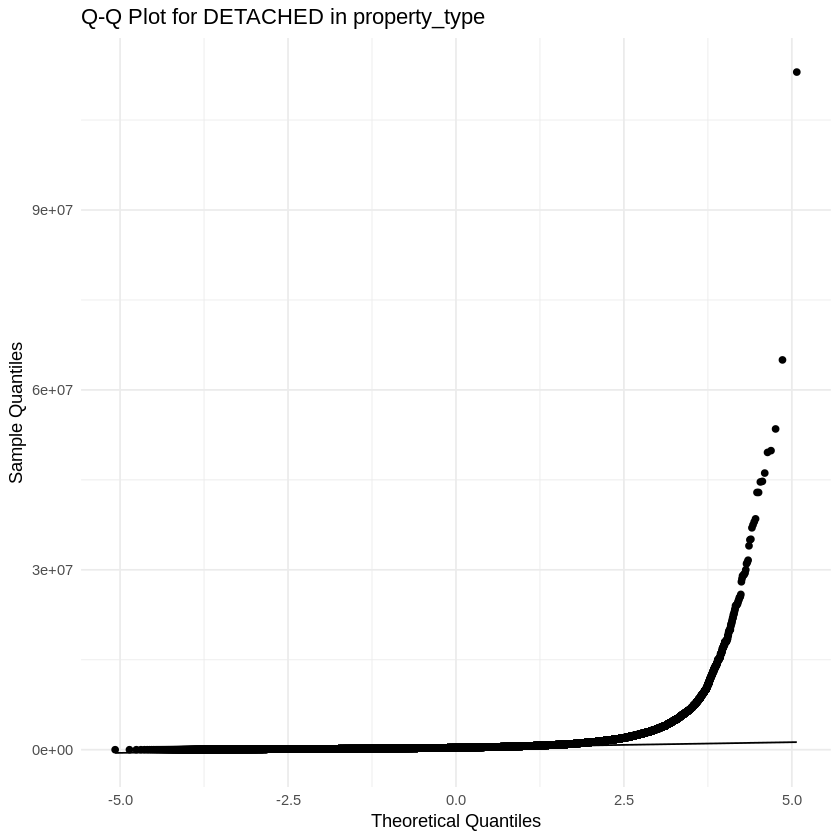

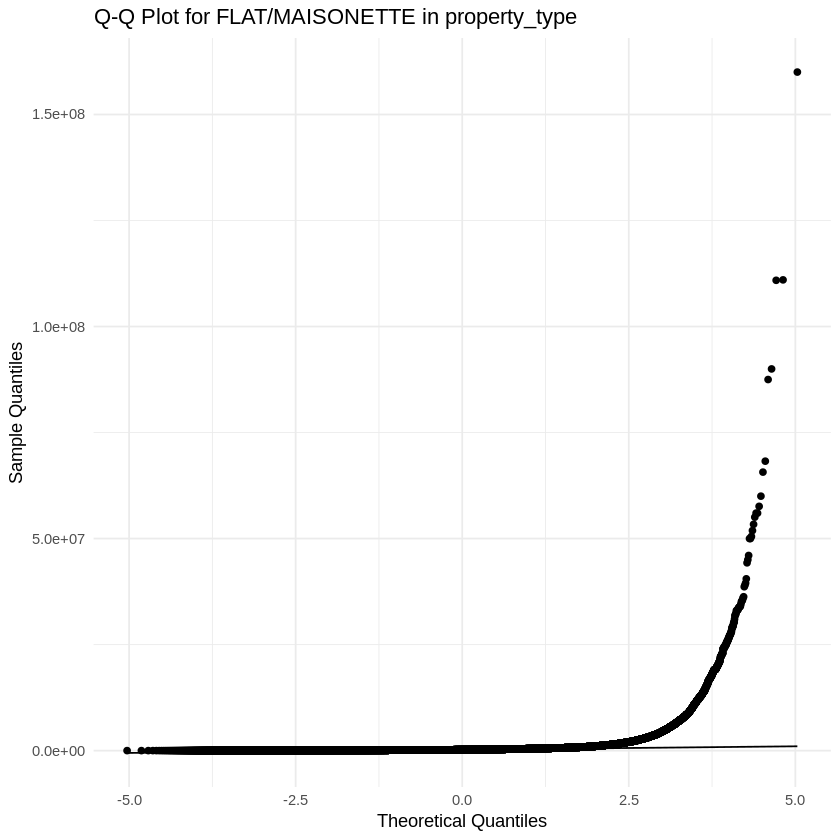

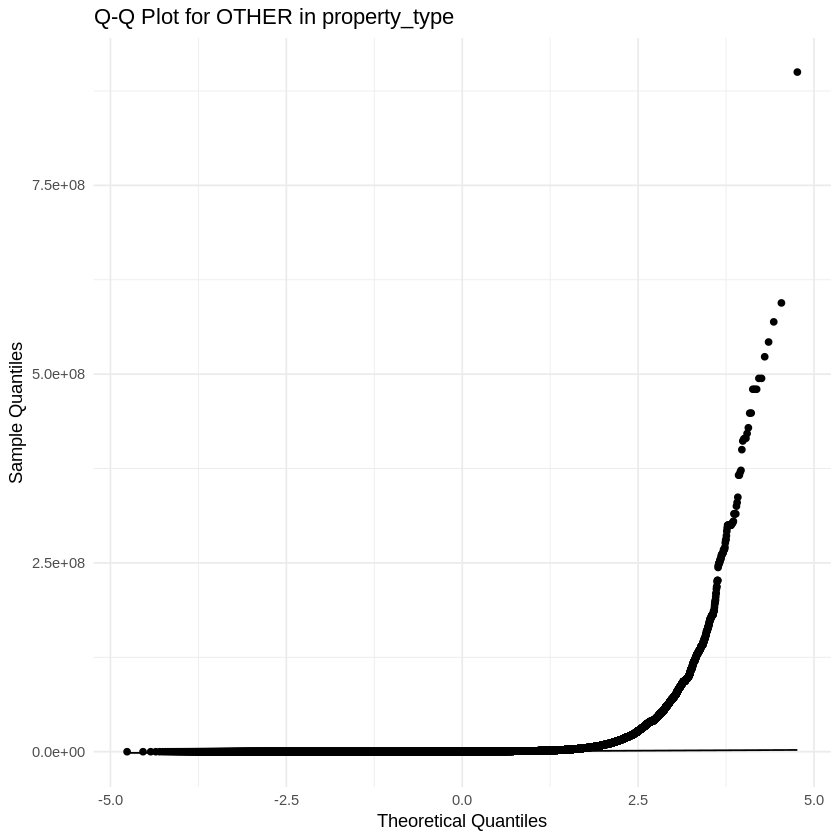

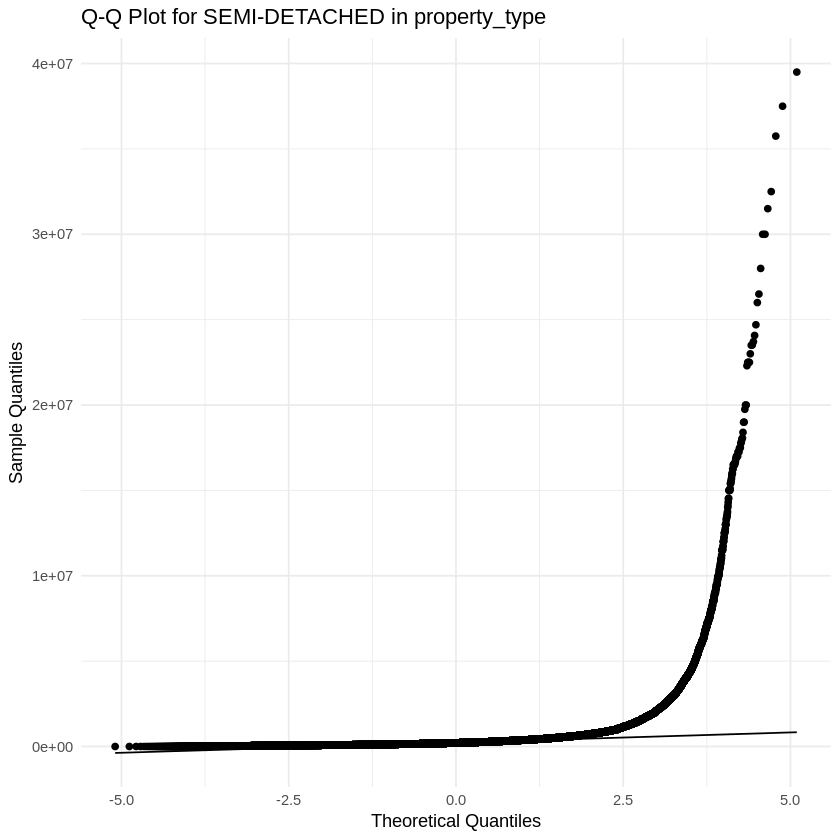

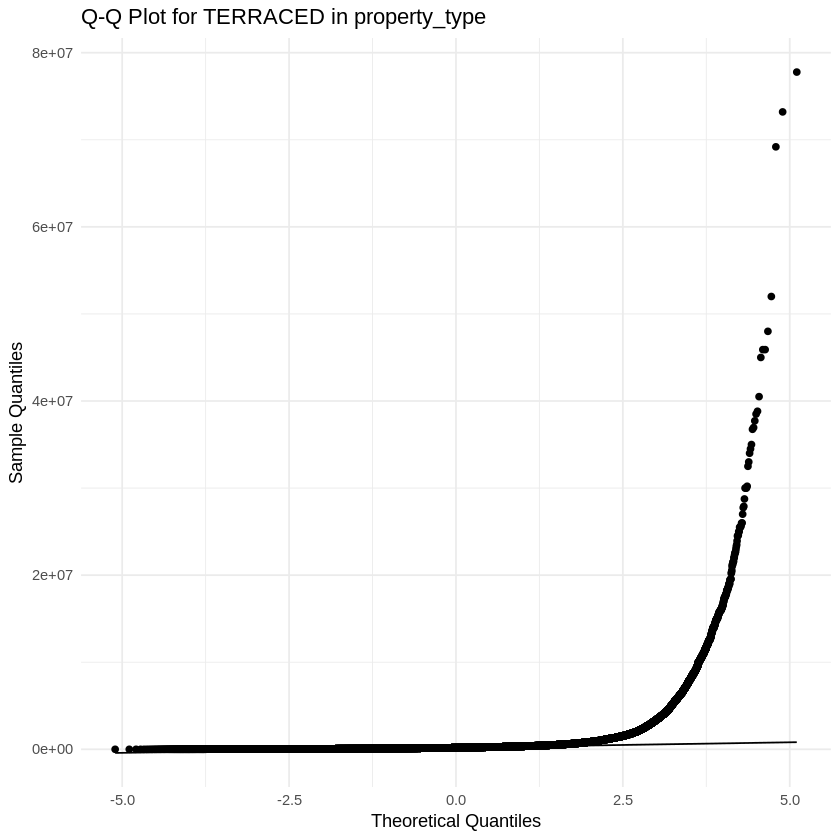

In [ ]:

# Example for property_type
for (property in levels(df_c$property_type)) {
  data <- df_c[df_c$property_type == property, "price_paid"]
  # Here we create a data frame with the correct column name 'price_paid'
  plot_data <- data.frame(price_paid = data)

  p <- ggplot(plot_data, aes(sample = price_paid)) +
    stat_qq() +
    stat_qq_line() +
    labs(title = paste("Q-Q Plot for", property, "in property_type"),
         x = "Theoretical Quantiles",
         y = "Sample Quantiles") +
    theme_minimal()
  print(p)
}

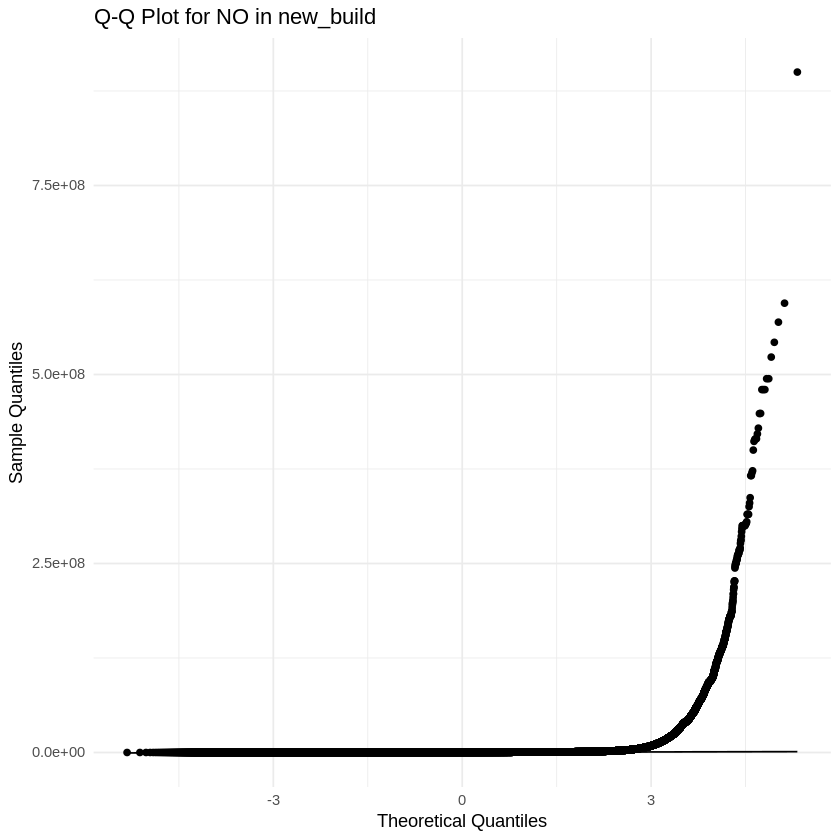

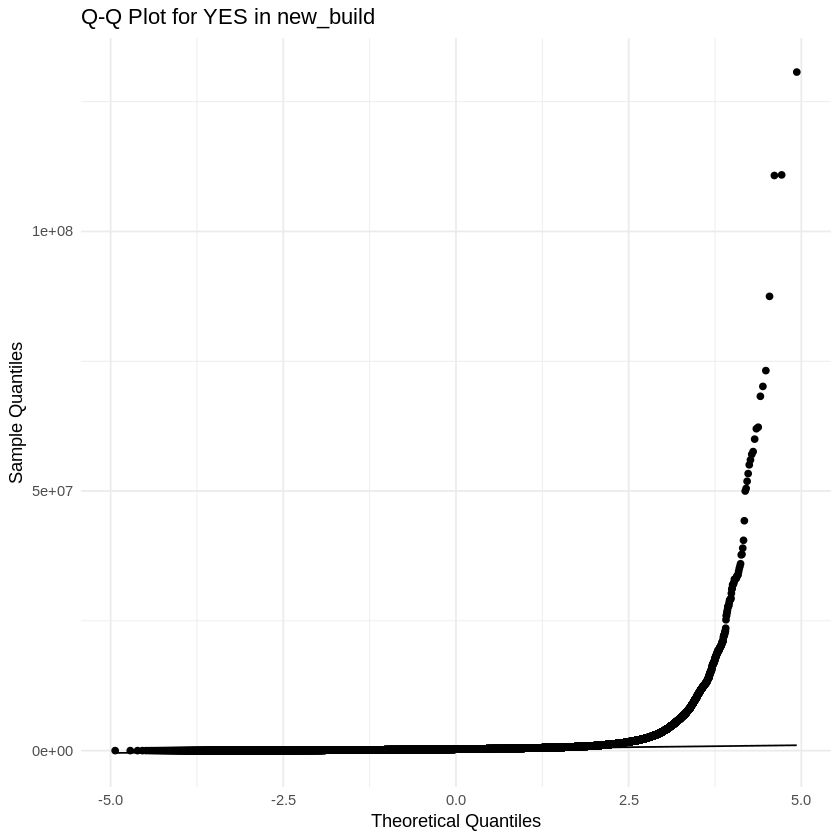

In [ ]:
# Example for property_type
for (building in levels(df_c$new_build)) {
  data <- df_c[df_c$new_build == building, "price_paid"]
  # Here we create a data frame with the correct column name 'price_paid'
  plot_data <- data.frame(price_paid = data)

  p <- ggplot(plot_data, aes(sample = price_paid)) +
    stat_qq() +
    stat_qq_line() +
    labs(title = paste("Q-Q Plot for", building, "in new_build"),
         x = "Theoretical Quantiles",
         y = "Sample Quantiles") +
    theme_minimal()
  print(p)
}

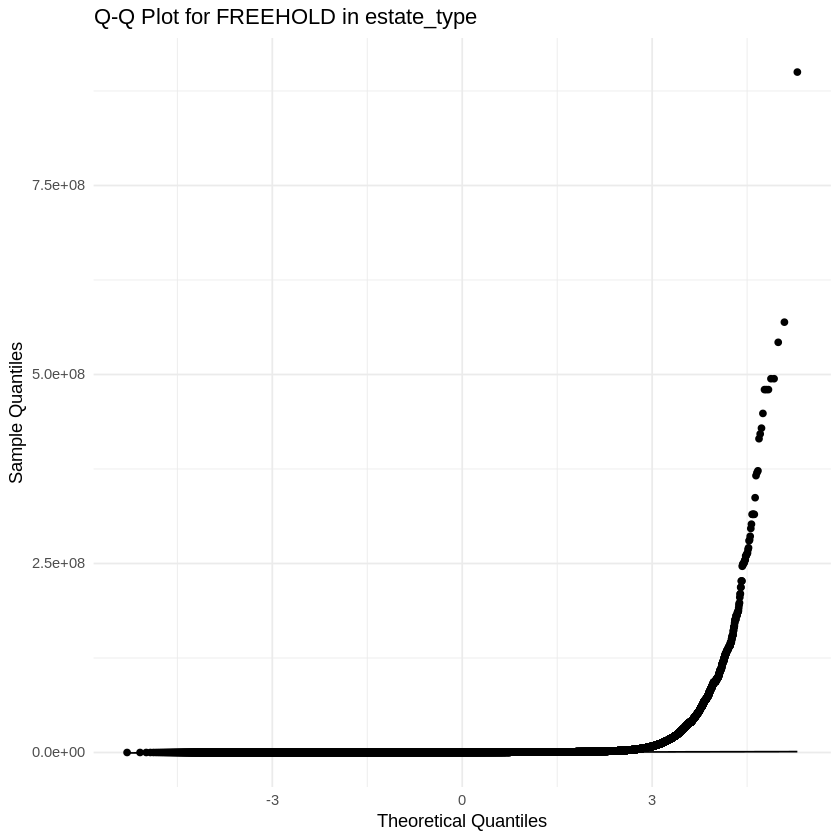

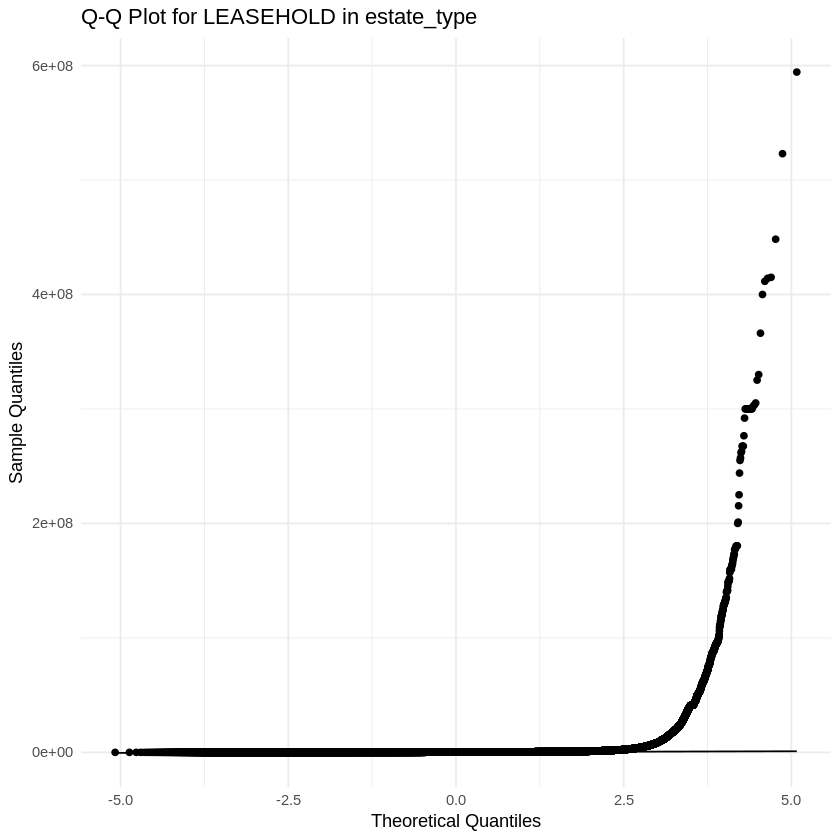

In [ ]:
# Example for property_type
for (estate in levels(df_c$estate_type)) {
  data <- df_c[df_c$estate_type == estate, "price_paid"]
  # Here we create a data frame with the correct column name 'price_paid'
  plot_data <- data.frame(price_paid = data)

  p <- ggplot(plot_data, aes(sample = price_paid)) +
    stat_qq() +
    stat_qq_line() +
    labs(title = paste("Q-Q Plot for", estate, "in estate_type"),
         x = "Theoretical Quantiles",
         y = "Sample Quantiles") +
    theme_minimal()
  print(p)
}

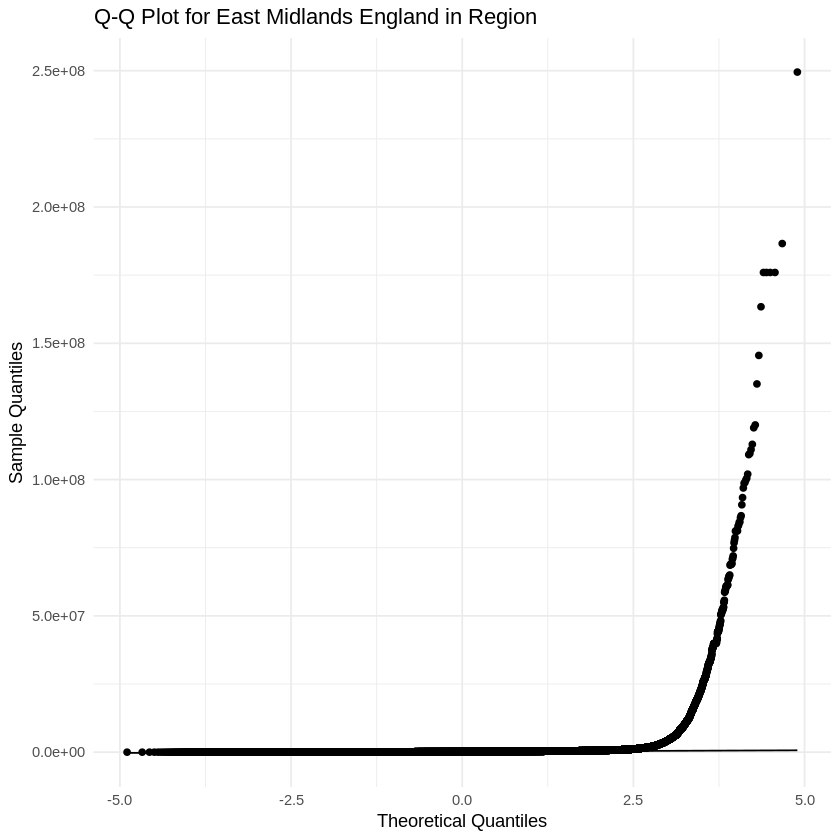

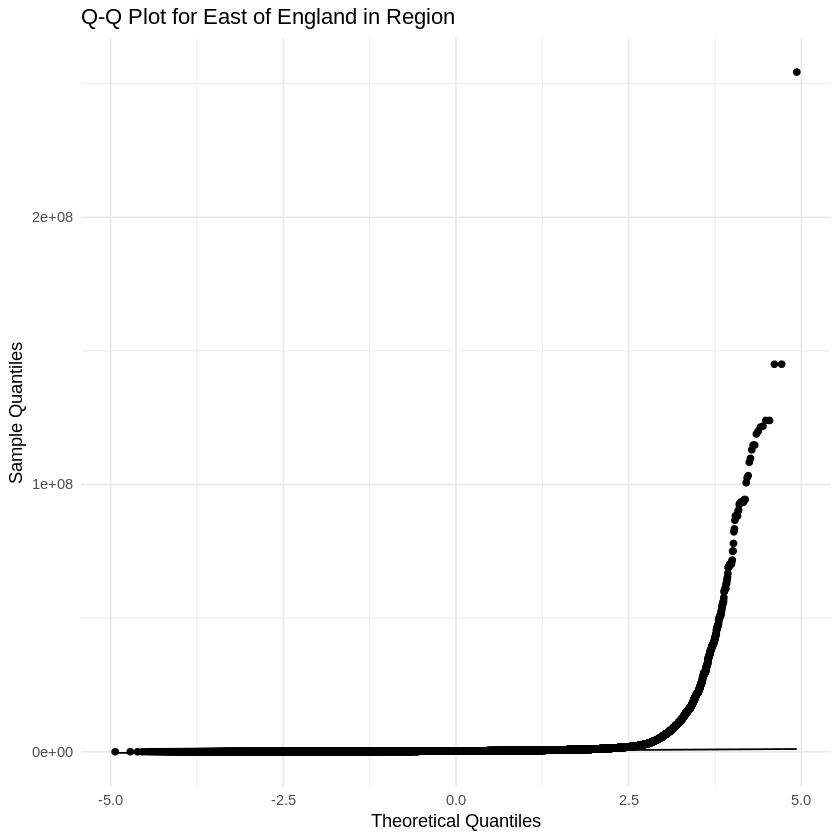

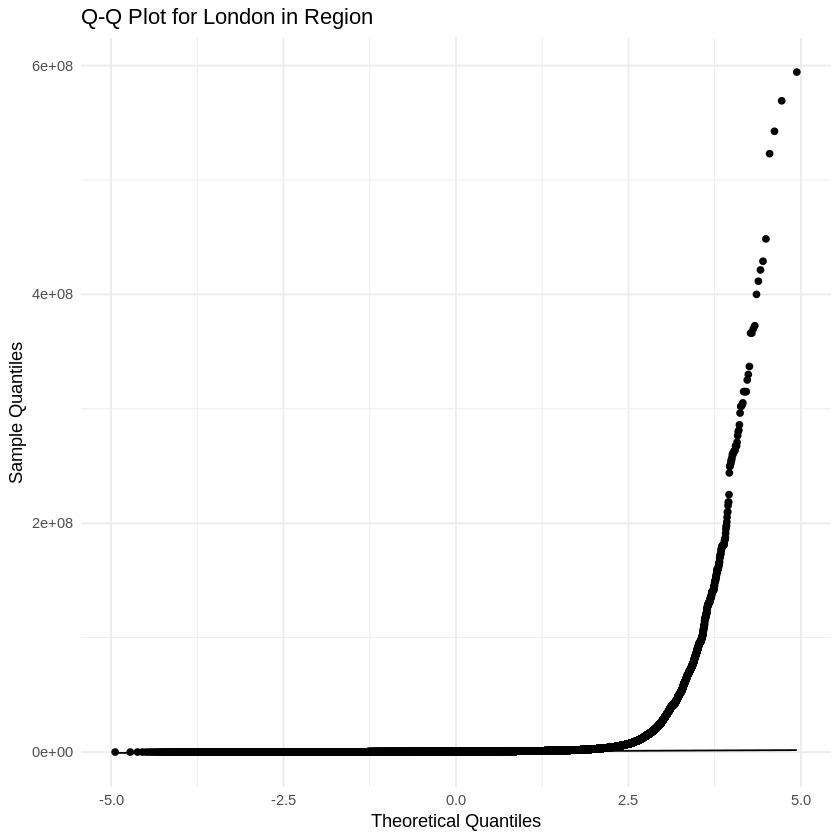

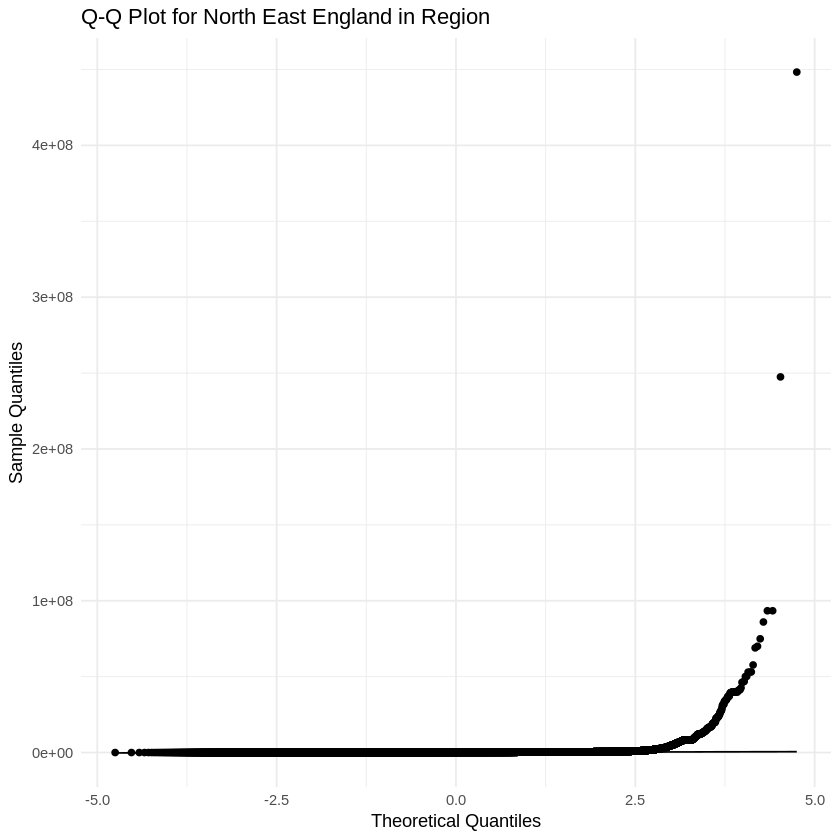

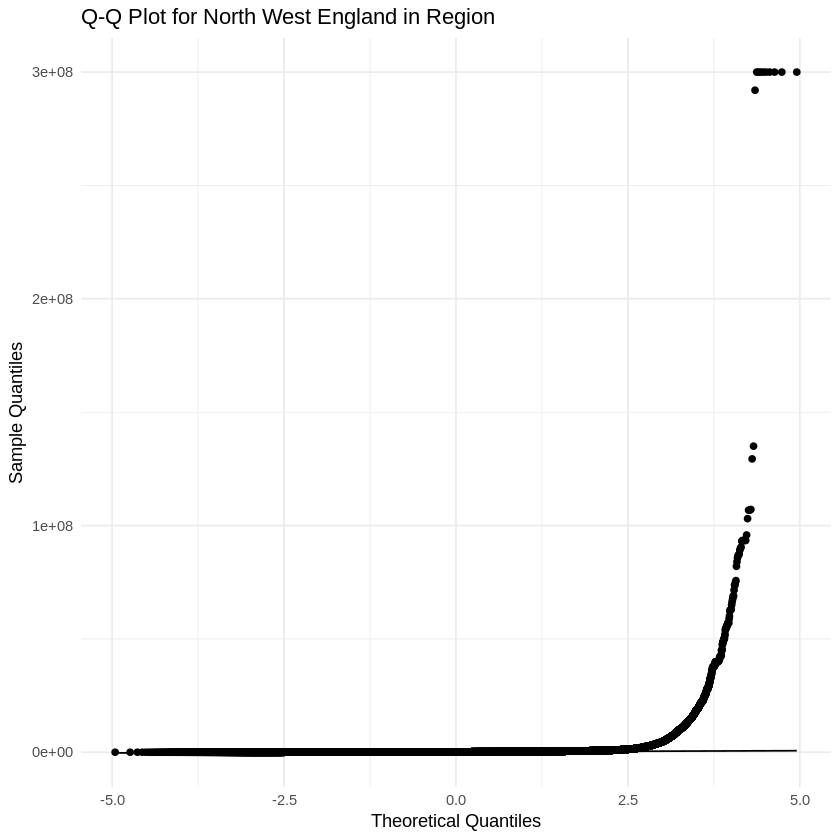

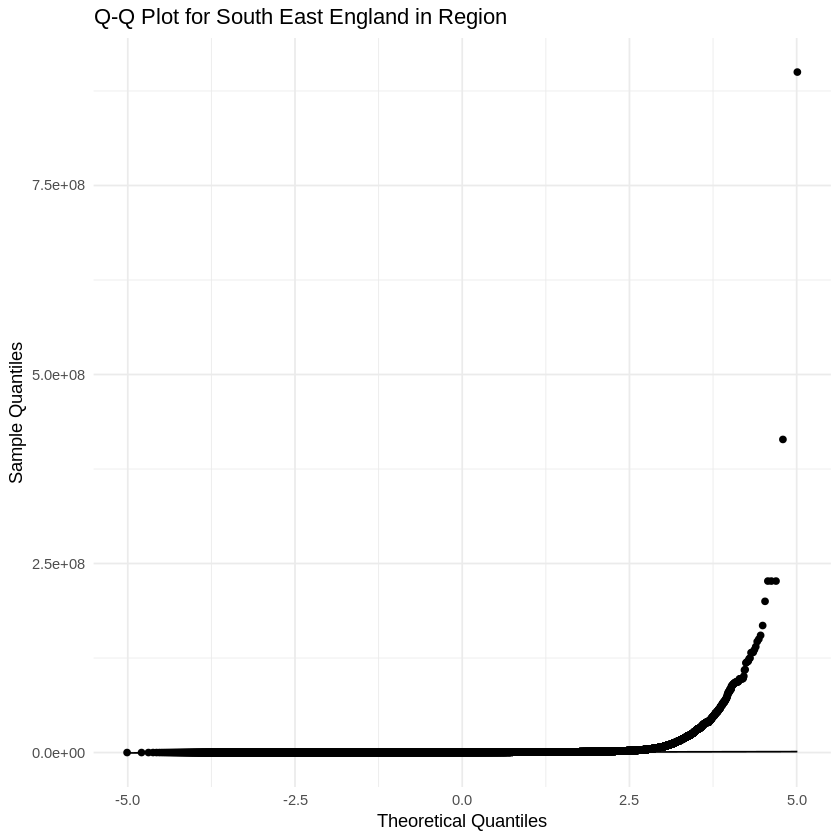

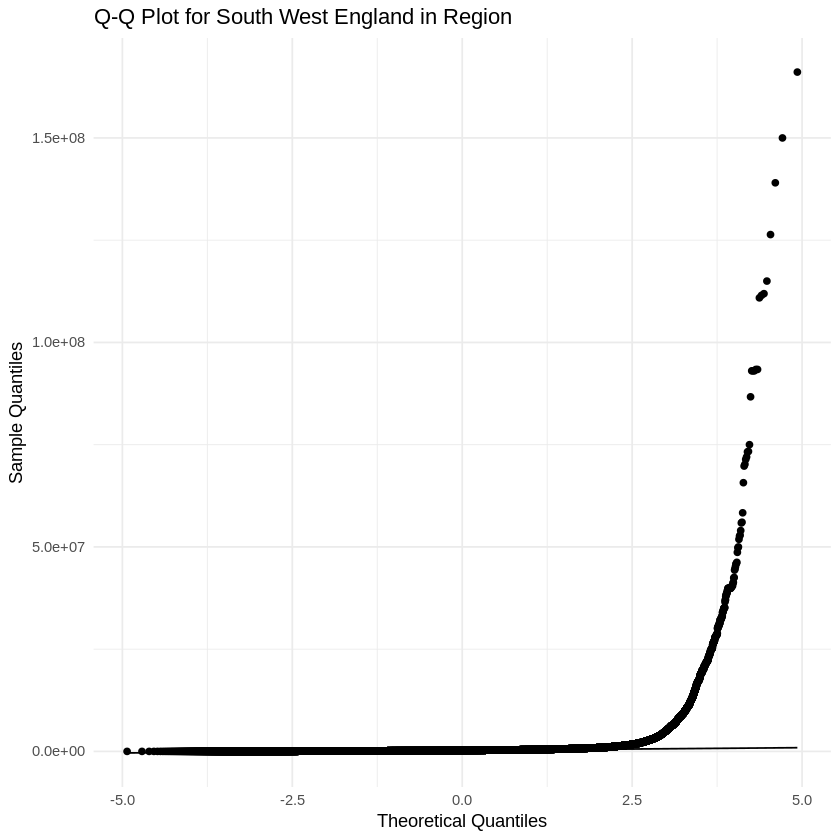

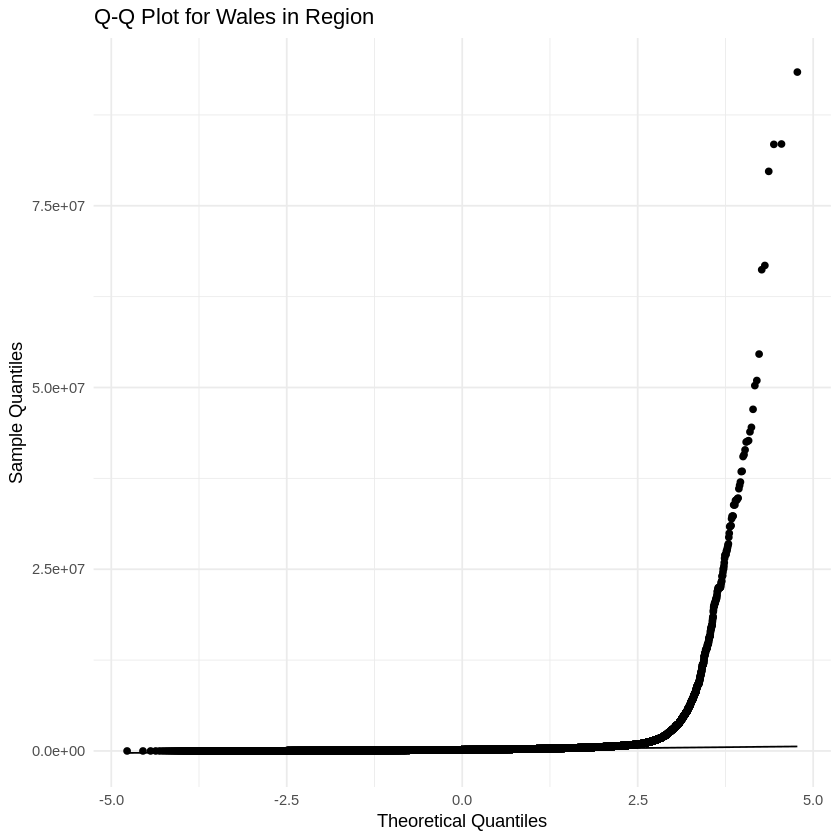

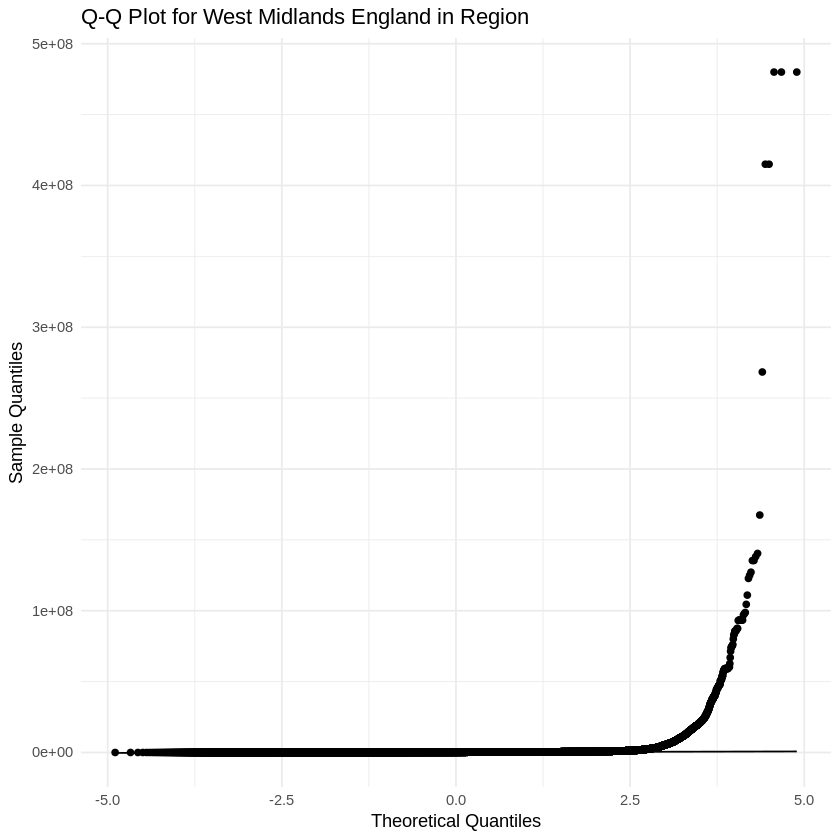

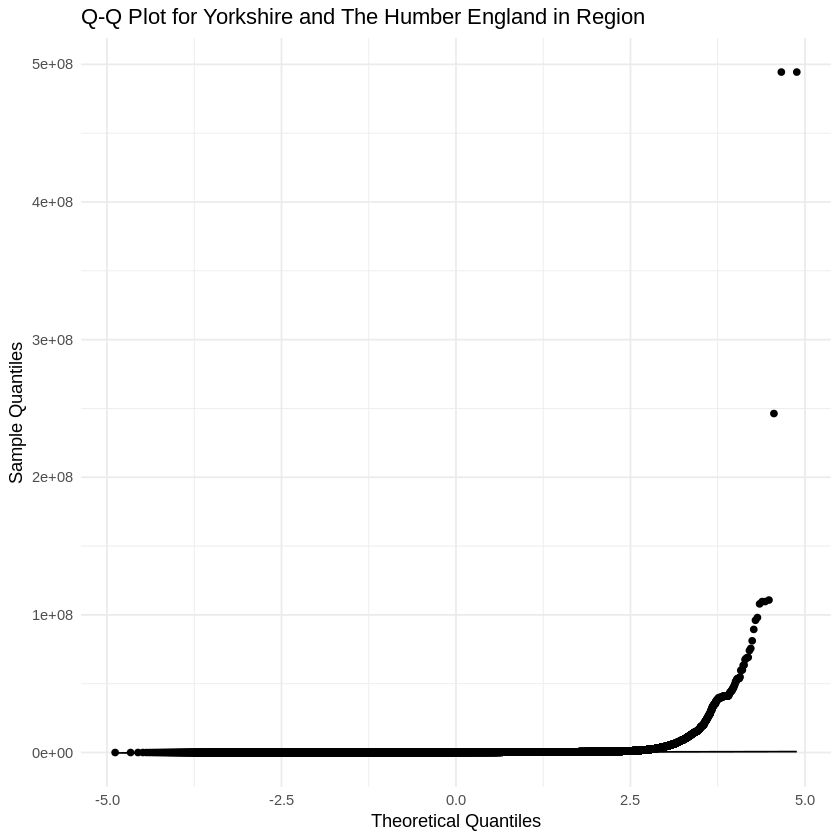

In [ ]:
# Example for property_type
for (Region in levels(df_c$Region)) {
  data <- df_c[df_c$Region == Region, "price_paid"]
  # Here we create a data frame with the correct column name 'price_paid'
  plot_data <- data.frame(price_paid = data)

  p <- ggplot(plot_data, aes(sample = price_paid)) +
    stat_qq() +
    stat_qq_line() +
    labs(title = paste("Q-Q Plot for", Region, "in Region"),
         x = "Theoretical Quantiles",
         y = "Sample Quantiles") +
    theme_minimal()
  print(p)
}

In [ ]:
# Check for NA values in price_paid
sum(is.na(df_c$price_paid))

[1] 0

In [ ]:
# Inspect the structure of df
str(df_c)

# Check if price_paid is numeric
if (!is.numeric(df_c$price_paid)) {
  # Convert to numeric if it's not
  df_c$price_paid <- as.numeric(as.character(df_c$price_paid))
}

tibble [11,011,497 × 15] (S3: tbl_df/tbl/data.frame)
 $ unique_id    : chr [1:11011497] "{14C264CE-A450-4424-B2FC-59BCB8673F31}" "{CF1B07BD-6D42-41A1-A7E2-52A23BFD3DF1}" "{B9B46180-204A-43BE-847C-52A25E2593F1}" "{260A3CB9-EFDD-4D5D-B626-562F93B5FF86}" ...
 $ price_paid   : num [1:11011497] 150000 230000 182000 185000 265000 ...
 $ deed_date    : POSIXct[1:11011497], format: "2013-12-20" "2013-07-05" ...
 $ postcode     : chr [1:11011497] "PE7 2PP" "EN9 3ED" "ST7 2BH" "LE9 6QP" ...
 $ property_type: Factor w/ 5 levels "DETACHED","FLAT/MAISONETTE",..: 4 5 1 1 1 2 4 4 1 1 ...
 $ new_build    : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ estate_type  : Factor w/ 2 levels "FREEHOLD","LEASEHOLD": 1 1 1 1 1 2 1 1 1 1 ...
 $ street       : chr [1:11011497] "WHITTLESEY ROAD" "CULLINGS COURT" "STANLEY COURT" "MERTON CLOSE" ...
 $ locality     : chr [1:11011497] NA NA "ALSAGER" "BROUGHTON ASTLEY" ...
 $ town         : chr [1:11011497] "PETERBOROUGH" "WALTHAM ABBEY" "STOKE-ON-TRENT" 

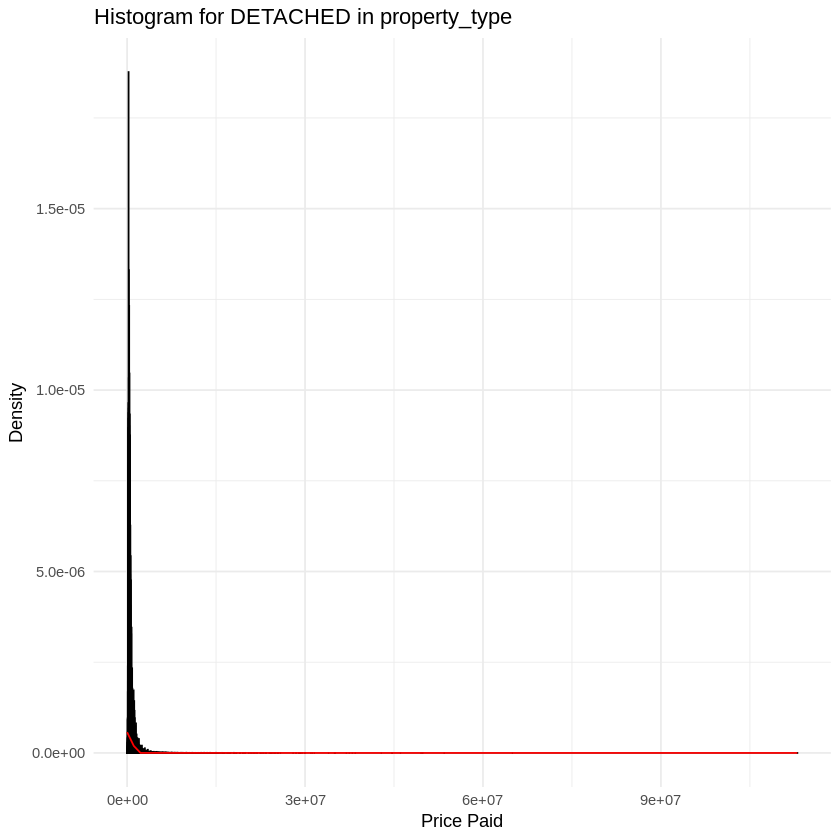

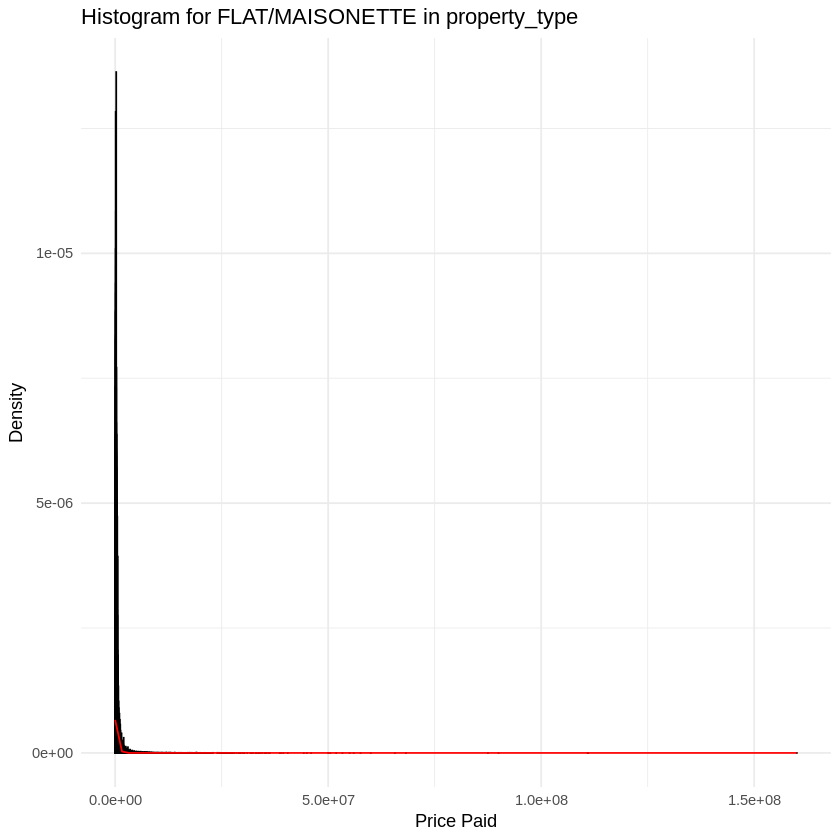

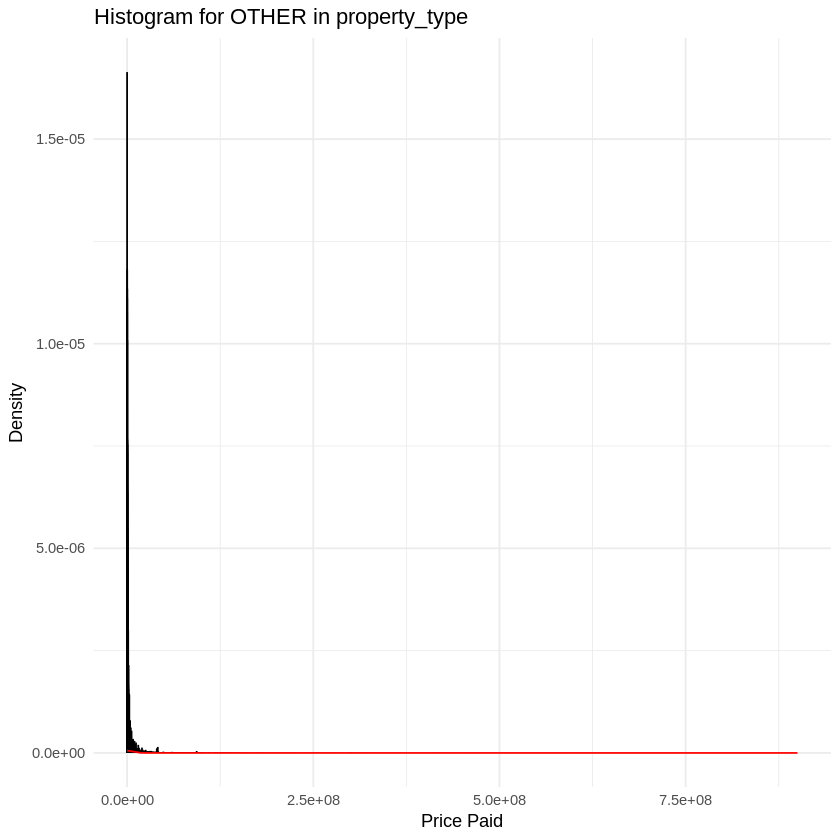

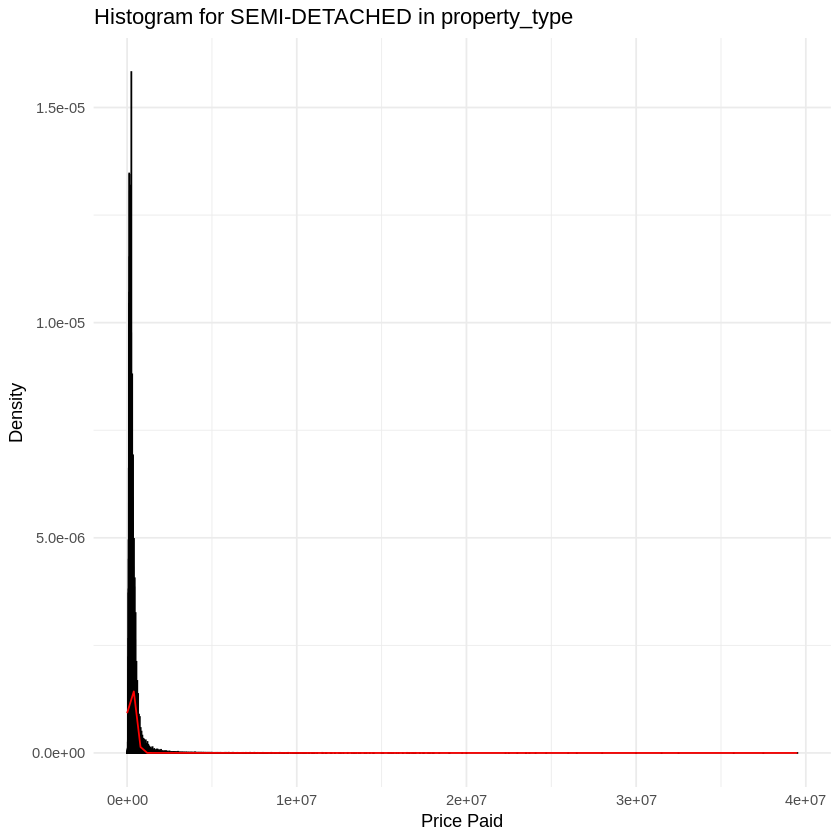

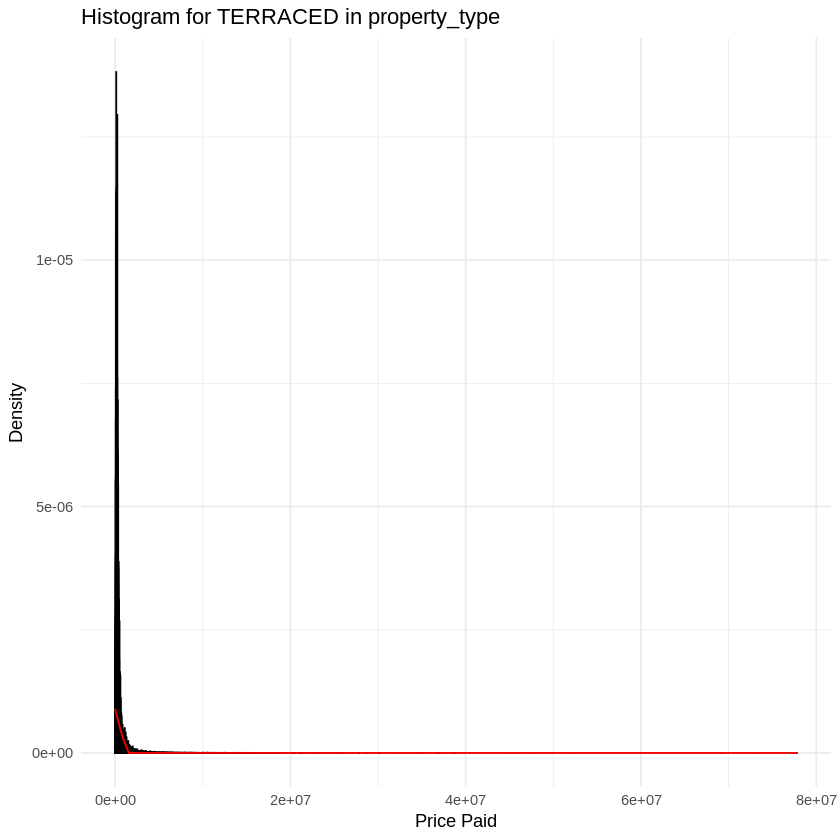

In [ ]:
# Example for property_type
for (property in levels(df_c$property_type)) {
  # Subset the data for the current property type
  data <- df_c[df_c$property_type == property, "price_paid"]

  # Create the plot
  p <- ggplot(data.frame(price_paid = data$price_paid), aes(x = price_paid)) +
    geom_histogram(aes(y = after_stat(density)), binwidth = 1000, fill = "skyblue", color = "black") +
    stat_function(fun = dnorm, args = list(mean = mean(data$price_paid), sd = sd(data$price_paid)), color = "red") +
    labs(title = paste("Histogram for", property, "in property_type"),
         x = "Price Paid", y = "Density") +
    theme_minimal()

  # Print the plot
  print(p)
}

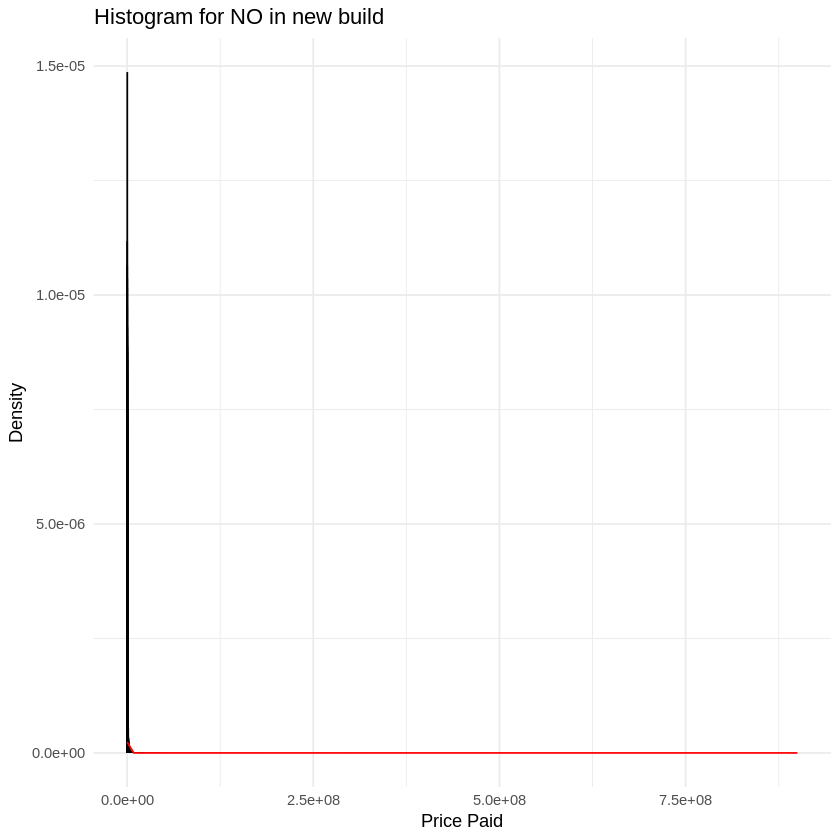

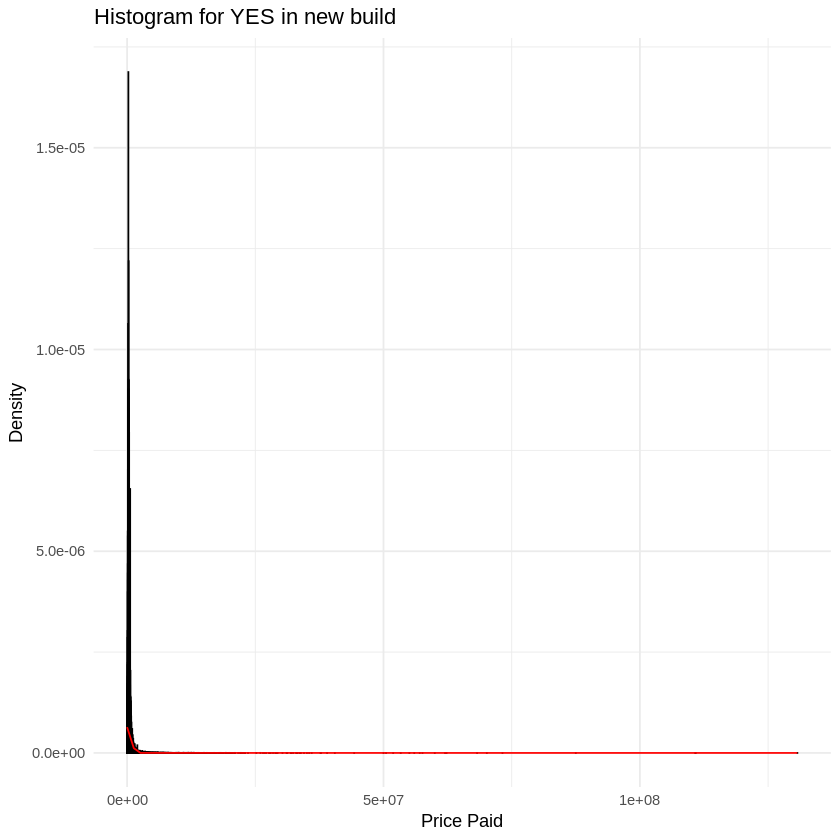

In [ ]:
# Example for property_type
for (building in levels(df_c$new_build)) {
  # Subset the data for the current property type
  data <- df_c[df_c$new_build == building, "price_paid"]

  # Create the plot
  p <- ggplot(data.frame(price_paid = data$price_paid), aes(x = price_paid)) +
    geom_histogram(aes(y = after_stat(density)), binwidth = 1000, fill = "skyblue", color = "black") +
    stat_function(fun = dnorm, args = list(mean = mean(data$price_paid), sd = sd(data$price_paid)), color = "red") +
    labs(title = paste("Histogram for", building, "in new build"),
         x = "Price Paid", y = "Density") +
    theme_minimal()

  # Print the plot
  print(p)
}

In [ ]:
# Check the structure of df_c to identify categorical columns
str(df_c)

# Assuming you want to convert all non-numeric columns to numeric
categorical_cols <- sapply(df_c, function(x) !is.numeric(x))
categorical_cols_names <- names(df_c)[categorical_cols]

tibble [11,011,497 × 15] (S3: tbl_df/tbl/data.frame)
 $ unique_id    : chr [1:11011497] "{14C264CE-A450-4424-B2FC-59BCB8673F31}" "{CF1B07BD-6D42-41A1-A7E2-52A23BFD3DF1}" "{B9B46180-204A-43BE-847C-52A25E2593F1}" "{260A3CB9-EFDD-4D5D-B626-562F93B5FF86}" ...
 $ price_paid   : num [1:11011497] 150000 230000 182000 185000 265000 ...
 $ deed_date    : POSIXct[1:11011497], format: "2013-12-20" "2013-07-05" ...
 $ postcode     : chr [1:11011497] "PE7 2PP" "EN9 3ED" "ST7 2BH" "LE9 6QP" ...
 $ property_type: Factor w/ 5 levels "DETACHED","FLAT/MAISONETTE",..: 4 5 1 1 1 2 4 4 1 1 ...
 $ new_build    : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ estate_type  : Factor w/ 2 levels "FREEHOLD","LEASEHOLD": 1 1 1 1 1 2 1 1 1 1 ...
 $ street       : chr [1:11011497] "WHITTLESEY ROAD" "CULLINGS COURT" "STANLEY COURT" "MERTON CLOSE" ...
 $ locality     : chr [1:11011497] NA NA "ALSAGER" "BROUGHTON ASTLEY" ...
 $ town         : chr [1:11011497] "PETERBOROUGH" "WALTHAM ABBEY" "STOKE-ON-TRENT" 

In [ ]:
df_2 <- df_f

In [ ]:
# Function to convert categorical to numeric based on order
convert_to_numeric <- function(x) {
  as.numeric(factor(x, levels = unique(x)))
}

# Apply the function to each categorical column
df_2$property_type_num <- convert_to_numeric(df_2$property_type)
df_2$new_build_num <- convert_to_numeric(df_2$new_build)
df_2$estate_type_num <- convert_to_numeric(df_2$estate_type)
df_2$Region_num <- convert_to_numeric(df_2$Region)
df_2$deed_year_num <- convert_to_numeric(df_2$deed_year)

In [ ]:
# Compute Spearman correlation
correlations <- cor(df_2[, c("property_type_num", "new_build_num", "estate_type_num", "Region_num", "deed_year_num", "price_paid")],
                    method = "spearman", use = "complete.obs")

# Print the correlation matrix
print(correlations)

                  property_type_num new_build_num estate_type_num   Region_num
property_type_num        1.00000000   0.094266378      0.52294500 -0.012237782
new_build_num            0.09426638   1.000000000      0.09107986 -0.007068884
estate_type_num          0.52294500   0.091079859      1.00000000 -0.050646971
Region_num              -0.01223778  -0.007068884     -0.05064697  1.000000000
deed_year_num            0.01322805   0.011543166     -0.01818922  0.005813913
price_paid               0.12873199   0.092467961     -0.12917539 -0.053637705
                  deed_year_num  price_paid
property_type_num   0.013228049  0.12873199
new_build_num       0.011543166  0.09246796
estate_type_num    -0.018189219 -0.12917539
Region_num          0.005813913 -0.05363770
deed_year_num       1.000000000  0.17952042
price_paid          0.179520419  1.00000000


In [ ]:
install.packages(c("corrplot"))
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.95 loaded



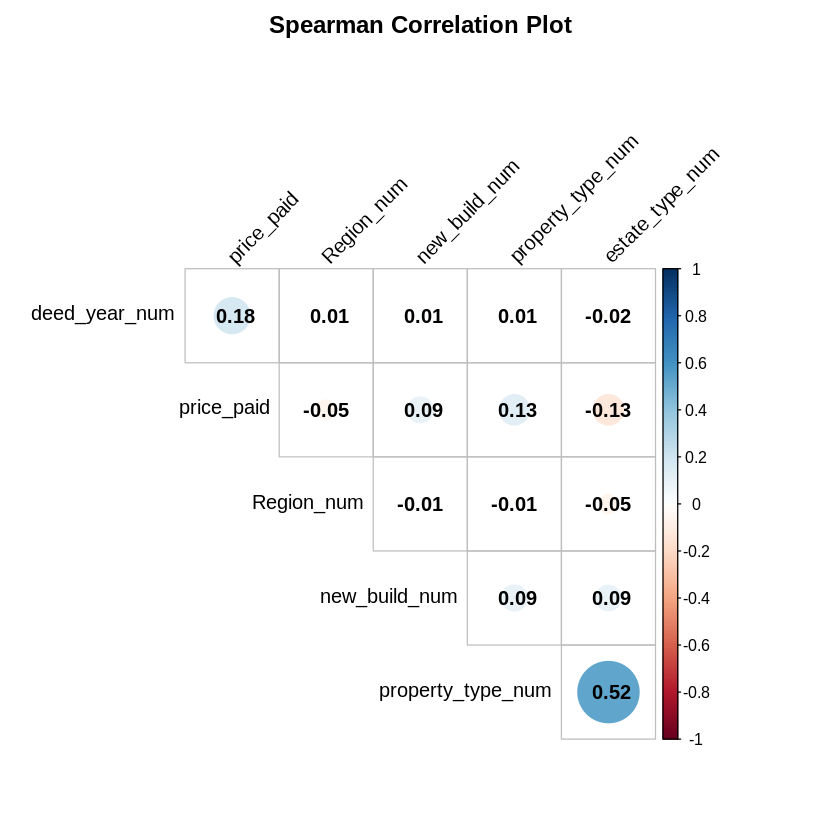

In [ ]:

# Plot the correlation matrix
corrplot(correlations, method = "circle",
         type = "upper", order = "hclust",
         addCoef.col = "black", # Add correlation coefficients
         tl.col = "black", tl.srt = 45, # Text label color and rotation
         diag = FALSE, # Hide the diagonal
         title = "Spearman Correlation Plot",
         mar = c(0, 0, 2, 0)) # Margin to fit the title

In [ ]:
# Assuming your dataframe is named 'df' and the column is 'price_paid'

# Calculate IQR for price_paid
Q <- quantile(df_2$price_paid, probs=c(.25, .75), na.rm = TRUE)
iqr <- IQR(df_2$price_paid, na.rm = TRUE)

# Define upper and lower bounds
lower_bound <- Q[1] - 6 * iqr
upper_bound <- Q[2] + 6 * iqr

# Check if there are any outliers in the price_paid column
has_outliers <- any(df_2$price_paid < lower_bound | df_2$price_paid > upper_bound, na.rm = TRUE)

if(has_outliers) {
  # If there are outliers, you can decide what to do:
  # Option 1: Remove rows with outliers
  df_without_outliers <- df_2[df_2$price_paid >= lower_bound & df_2$price_paid <= upper_bound, ]

  print("Action taken on outliers in 'price_paid' column.")
  # You might want to print or check the new data structure here
} else {
  print("No outliers detected in the 'price_paid' column.")
}

[1] "Action taken on outliers in 'price_paid' column."


In [ ]:
summary(df_without_outliers)

  unique_id           price_paid        deed_date                     
 Length:10900999    Min.   :      1   Min.   :2013-01-01 00:00:00.00  
 Class :character   1st Qu.: 146000   1st Qu.:2015-12-11 00:00:00.00  
 Mode  :character   Median : 230000   Median :2018-08-03 00:00:00.00  
                    Mean   : 286374   Mean   :2018-08-03 22:05:30.14  
                    3rd Qu.: 355000   3rd Qu.:2021-04-19 00:00:00.00  
                    Max.   :1655400   Max.   :2023-12-31 00:00:00.00  
   postcode         property_type       new_build         estate_type       
 Length:10900999    Length:10900999    Length:10900999    Length:10900999   
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                         

In [ ]:
# Top 10 lowest prices
lowest_prices <- df_without_outliers %>%
  slice_min(price_paid, n = 10) %>%
  select(price_paid, price_paid)

# Top 10 highest prices
highest_prices <- df_without_outliers %>%
  slice_max(price_paid, n = 10) %>%
  select(price_paid, price_paid)

# View the results
print("Top 10 Lowest Prices:")
print(lowest_prices)

print("Top 10 Highest Prices:")
print(highest_prices)

[1] "Top 10 Lowest Prices:"
# A tibble: 552 × 1
   price_paid
        <dbl>
 1          1
 2          1
 3          1
 4          1
 5          1
 6          1
 7        100
 8        100
 9        100
10        100
# ℹ 542 more rows
[1] "Top 10 Highest Prices:"
# A tibble: 128 × 1
   price_paid
        <dbl>
 1    1655400
 2    1655334
 3    1655100
 4    1655062
 5    1655010
 6    1655000
 7    1655000
 8    1655000
 9    1655000
10    1655000
# ℹ 118 more rows


In [ ]:
# Assuming your dataframe is named 'df' and the column of interest is 'price_paid'

# Define your bins (adjust these according to your data range)
bins <- seq(0, max(df_without_outliers$price_paid, na.rm = TRUE), by = 10000)

# Create bins for the data
binned_data <- cut(df_without_outliers$price_paid, breaks = bins, include.lowest = TRUE, right = FALSE)

# Count the frequency in each bin
frequency_table <- table(binned_data)

# Print the results
cat("Frequency of values in bins:\n")
print(frequency_table)

Frequency of values in bins:
binned_data
        [0,1e+04)     [1e+04,2e+04)     [2e+04,3e+04)     [3e+04,4e+04) 
            35828             22206             25302             46858 
    [4e+04,5e+04)     [5e+04,6e+04)     [6e+04,7e+04)     [7e+04,8e+04) 
            64086            110294            159037            203243 
    [8e+04,9e+04)     [9e+04,1e+05)   [1e+05,1.1e+05) [1.1e+05,1.2e+05) 
           242258            250779            257735            313530 
[1.2e+05,1.3e+05) [1.3e+05,1.4e+05) [1.4e+05,1.5e+05) [1.5e+05,1.6e+05) 
           391663            353417            346473            366403 
[1.6e+05,1.7e+05) [1.7e+05,1.8e+05) [1.8e+05,1.9e+05)   [1.9e+05,2e+05) 
           373324            360309            350865            304618 
  [2e+05,2.1e+05) [2.1e+05,2.2e+05) [2.2e+05,2.3e+05) [2.3e+05,2.4e+05) 
           268783            287918            302563            280470 
[2.4e+05,2.5e+05) [2.5e+05,2.6e+05) [2.6e+05,2.7e+05) [2.7e+05,2.8e+05) 
          

In [ ]:
# Assuming your dataframe is named 'df'
number_of_rows <- sum(df_without_outliers$price_paid < 30000, na.rm = TRUE)

# Print the result
print(number_of_rows)

[1] 83609


In [ ]:
# Assuming your dataframe is named 'df'
df_final <- df_without_outliers[df_without_outliers$price_paid >= 30000, ]

str(df_final)

tibble [10,817,390 × 15] (S3: tbl_df/tbl/data.frame)
 $ unique_id    : chr [1:10817390] "{AF8A3AFB-940A-4FB6-B8BC-8DC69843B14E}" "{170B6EC9-8191-42BB-A389-831E1596BE95}" "{D312D296-8D71-4513-B356-831E2A06ADD4}" "{F12996A5-1F89-44C1-AE59-9160AD54F7AA}" ...
 $ price_paid   : num [1:10817390] 975000 250000 132000 237000 227500 ...
 $ deed_date    : POSIXct[1:10817390], format: "2013-03-15" "2013-04-12" ...
 $ postcode     : chr [1:10817390] "SE22 8UR" "PE38 9WB" "TA5 2GL" "RH16 4PE" ...
 $ property_type: chr [1:10817390] "TERRACED" "DETACHED" "TERRACED" "SEMI-DETACHED" ...
 $ new_build    : chr [1:10817390] "NO" "NO" "YES" "NO" ...
 $ estate_type  : chr [1:10817390] "FREEHOLD" "FREEHOLD" "FREEHOLD" "FREEHOLD" ...
 $ street       : chr [1:10817390] "WOODWARDE ROAD" "CORIANDER ROAD" "ANGELICA DRIVE" "SUNNYWOOD DRIVE" ...
 $ locality     : chr [1:10817390] "DULWICH" NA "NORTH PETHERTON" NA ...
 $ town         : chr [1:10817390] "LONDON" "DOWNHAM MARKET" "BRIDGWATER" "HAYWARDS HEATH" ...
 $ d

In [ ]:
# Using writexl package
install.packages("writexl")
library(writexl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# downloading an excel for visualization
write.csv(df_final, file = "my_data.csv", row.names = FALSE)

In [ ]:
# Convert categorical variables to factors
df_final$property_type <- as.factor(df_final$property_type)
df_final$new_build <- as.factor(df_final$new_build)
df_final$estate_type <- as.factor(df_final$estate_type)
df_final$Region <- as.factor(df_final$Region)
df_final$deed_year <- as.factor(df_final$deed_year)

In [ ]:
str(df_final)

tibble [10,804,854 × 20] (S3: tbl_df/tbl/data.frame)
 $ unique_id        : chr [1:10804854] "{14C264CE-A450-4424-B2FC-59BCB8673F31}" "{CF1B07BD-6D42-41A1-A7E2-52A23BFD3DF1}" "{B9B46180-204A-43BE-847C-52A25E2593F1}" "{260A3CB9-EFDD-4D5D-B626-562F93B5FF86}" ...
 $ price_paid       : num [1:10804854] 150000 230000 182000 185000 265000 ...
 $ deed_date        : POSIXct[1:10804854], format: "2013-12-20" "2013-07-05" ...
 $ postcode         : chr [1:10804854] "PE7 2PP" "EN9 3ED" "ST7 2BH" "LE9 6QP" ...
 $ property_type    : Factor w/ 5 levels "DETACHED","FLAT/MAISONETTE",..: 4 5 1 1 1 2 4 4 1 1 ...
 $ new_build        : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 1 1 ...
 $ estate_type      : Factor w/ 2 levels "FREEHOLD","LEASEHOLD": 1 1 1 1 1 2 1 1 1 1 ...
 $ street           : chr [1:10804854] "WHITTLESEY ROAD" "CULLINGS COURT" "STANLEY COURT" "MERTON CLOSE" ...
 $ locality         : chr [1:10804854] NA NA "ALSAGER" "BROUGHTON ASTLEY" ...
 $ town             : chr [1:10804854] "PETERBO

In [ ]:
# Assuming 'postcode' is the column name in your dataframe 'aggregated_data'
df_final$new_postcode <- substr(df_final$postcode, 1, 4)

In [ ]:
library(dplyr)
aggregated_data <- df_final %>%
  group_by(county, deed_year, property_type, estate_type, new_build, Region, district, new_postcode) %>%
  summarise(average_price = mean(price_paid, na.rm = TRUE))

head(aggregated_data)

`summarise()` has grouped output by 'county', 'deed_year', 'property_type',
'estate_type', 'new_build', 'Region', 'district'. You can override using the
`.groups` argument.


county,deed_year,property_type,estate_type,new_build,Region,district,new_postcode,average_price
<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BATH AND NORTH EAST SOMERSET,BA1,612583.5
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BATH AND NORTH EAST SOMERSET,BA2,483595.3
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BATH AND NORTH EAST SOMERSET,BA3,264322.1
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BATH AND NORTH EAST SOMERSET,BS14,339785.7
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BATH AND NORTH EAST SOMERSET,BS31,375498.4
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BATH AND NORTH EAST SOMERSET,BS39,343036.8


In [ ]:
# Check the current class of deed_year
class(aggregated_data$deed_year)

[1] "factor"

In [ ]:
# Convert back to numeric
aggregated_data$deed_year <- as.numeric(levels(aggregated_data$deed_year))[aggregated_data$deed_year]

# Check the class again to confirm it's numeric now
class(aggregated_data$deed_year)

[1] "numeric"

In [ ]:
class(aggregated_data)

[1] "grouped_df" "tbl_df"     "tbl"        "data.frame"

In [ ]:
str(aggregated_data)

gropd_df [20,732 × 6] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ county       : chr [1:20732] "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" ...
 $ deed_year    : Factor w/ 11 levels "2013","2014",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ property_type: Factor w/ 5 levels "DETACHED","FLAT/MAISONETTE",..: 1 1 1 2 2 2 2 3 3 4 ...
 $ estate_type  : Factor w/ 2 levels "FREEHOLD","LEASEHOLD": 1 1 2 1 1 2 2 1 2 1 ...
 $ new_build    : Factor w/ 2 levels "NO","YES": 1 2 1 1 2 1 2 1 1 1 ...
 $ average_price: num [1:20732] 443918 302844 453122 187000 140000 ...
 - attr(*, "groups")= tibble [12,363 × 5] (S3: tbl_df/tbl/data.frame)
  ..$ county       : chr [1:12363] "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" ...
  ..$ deed_year    : Factor w/ 11 levels "2013","2014",..: 1 1 1 1 1 1 1 1 1 1 ...
  ..$ property_type: Factor w/ 5 levels "DETACHED","FLAT/MAI

In [ ]:
# downloading an excel for visualization
write.csv(aggregated_data, file = "agg_data.csv", row.names = FALSE)

In [ ]:
install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
# Assuming you have time series data for each group
time_series <- ts(aggregated_data$average_price, frequency = 1, start = min(aggregated_data$deed_year))
arima_model <- auto.arima(time_series)
forecast_arima <- forecast(arima_model, h = 2)  # Predict 2 years ahead

In [ ]:
print(forecast_arima)

       Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
304377       291138.2 90326.52 491949.8 -15976.75 598253.1
304378       289877.2 81440.77 498313.6 -28898.82 608653.2


In [ ]:
accuracy(forecast_arima)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-0.363573,156692.9,99122.62,-23.58415,43.26426,0.8596143,-0.003262381


In [ ]:
# Extract point predictions
predicted_values <- as.numeric(forecast_arima$mean)

# Create years for prediction (assuming annual data)
future_years <- (max(aggregated_data$deed_year) + 1):(max(aggregated_data$deed_year) + length(predicted_values))

# Create a data frame with predictions
predictions_df <- data.frame(
  deed_year = future_years,
  predicted_avg_price = predicted_values
)

In [ ]:
# Combine the original data with the predictions

last_row <- tail(aggregated_data, 1)
replicated_last_row <- do.call("rbind", replicate(length(predicted_values), last_row, simplify=FALSE))

# Reset the deed_year and add the predicted price
replicated_last_row$deed_year <- future_years
replicated_last_row$average_price <- NULL  # Remove the old avg_price
replicated_last_row$predicted_avg_price <- predicted_values

# Combine with original data
aggregated_data_with_predictions <- rbind(aggregated_data, replicated_last_row)

# Check the result
head(aggregated_data_with_predictions)
tail(aggregated_data_with_predictions)

county,deed_year,property_type,estate_type,new_build,Region,average_price,predicted_avg_price
<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,443917.7,NA
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,YES,South West England,302843.6,NA
BATH AND NORTH EAST SOMERSET,2013,DETACHED,LEASEHOLD,NO,South West England,453121.7,NA
BATH AND NORTH EAST SOMERSET,2013,FLAT/MAISONETTE,FREEHOLD,NO,South West England,187000.0,NA
BATH AND NORTH EAST SOMERSET,2013,FLAT/MAISONETTE,FREEHOLD,YES,South West England,140000.0,NA
BATH AND NORTH EAST SOMERSET,2013,FLAT/MAISONETTE,LEASEHOLD,NO,South West England,234038.1,NA


county,deed_year,property_type,estate_type,new_build,Region,average_price,predicted_avg_price
<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
YORK,2023,SEMI-DETACHED,LEASEHOLD,YES,Yorkshire and The Humber England,185000.0,NA
YORK,2023,TERRACED,FREEHOLD,NO,Yorkshire and The Humber England,328990.2,NA
YORK,2023,TERRACED,FREEHOLD,YES,Yorkshire and The Humber England,247534.4,NA
YORK,2023,TERRACED,LEASEHOLD,NO,Yorkshire and The Humber England,251884.1,NA
YORK,2024,TERRACED,LEASEHOLD,NO,Yorkshire and The Humber England,NA,377241.9
YORK,2025,TERRACED,LEASEHOLD,NO,Yorkshire and The Humber England,NA,391389.1


In [ ]:
# Assuming the last year is the one to base predictions off of
last_year <- max(aggregated_data$deed_year)
unique_combinations <- aggregated_data[aggregated_data$deed_year == last_year, c("county", "property_type", "new_build", "estate_type", "new_postcode", "new_postcode" )]

# Remove any potential duplicates (although unlikely if deed_year is unique)
unique_combinations <- unique(unique_combinations)

In [ ]:
# Predict for the next 2 years, for example
future_years <- (last_year + 1):(last_year + 2)

In [ ]:
# Function to expand data for future years
expand_data <- function(df, future_years, predictions) {
  result <- data.frame()

  for (year in future_years) {
    # Clone the unique combinations for each year
    new_rows <- df
    new_rows$deed_year <- year
    new_rows$predicted_avg_price <- predictions[which(future_years == year)]
    result <- rbind(result, new_rows)
  }

  return(result)
}

# Apply the function
future_data <- expand_data(unique_combinations, future_years, predicted_values)

New names:
• `new_postcode` -> `new_postcode...5`
• `new_postcode` -> `new_postcode...6`
New names:
• `new_postcode` -> `new_postcode...5`
• `new_postcode` -> `new_postcode...6`


In [ ]:
# Combine
aggregated_data_with_predictions <- rbind(aggregated_data, future_data)

# Sort if necessary
aggregated_data_with_predictions <- aggregated_data_with_predictions[order(aggregated_data_with_predictions$county,
                                                                           aggregated_data_with_predictions$property_type,
                                                                           aggregated_data_with_predictions$new_build,
                                                                           aggregated_data_with_predictions$estate_type,
                                                                           aggregated_data_with_predictions$deed_year), ]

# Check the result
head(aggregated_data_with_predictions)
tail(aggregated_data_with_predictions)

county,deed_year,property_type,estate_type,new_build,Region,new_postcode,average_price,new_postcode...5,new_postcode...6,predicted_avg_price
<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BA1,612583.5,NA,NA,NA
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BA2,483595.3,NA,NA,NA
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BA3,264322.1,NA,NA,NA
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BS14,339785.7,NA,NA,NA
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BS31,375498.4,NA,NA,NA
BATH AND NORTH EAST SOMERSET,2013,DETACHED,FREEHOLD,NO,South West England,BS39,343036.8,NA,NA,NA


county,deed_year,property_type,estate_type,new_build,Region,new_postcode,average_price,new_postcode...5,new_postcode...6,predicted_avg_price
<chr>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
YORK,2025,TERRACED,FREEHOLD,YES,NA,NA,NA,YO30,YO30,289877.2
YORK,2025,TERRACED,FREEHOLD,YES,NA,NA,NA,YO32,YO32,289877.2
YORK,2013,TERRACED,LEASEHOLD,YES,Yorkshire and The Humber England,YO1,410000.0,NA,NA,NA
YORK,2013,TERRACED,LEASEHOLD,YES,Yorkshire and The Humber England,YO24,565000.0,NA,NA,NA
YORK,2014,TERRACED,LEASEHOLD,YES,Yorkshire and The Humber England,YO24,566333.3,NA,NA,NA
YORK,2016,TERRACED,LEASEHOLD,YES,Yorkshire and The Humber England,YO1,1555000.0,NA,NA,NA


In [ ]:
# downloading an excel for visualization
write.csv(aggregated_data_with_predictions, file = "agg_final.csv", row.names = FALSE)

In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




mtry = 1  OOB error = 34717288361 
Searching left ...
Searching right ...
  mtry    OOBError
1    1 34717288361


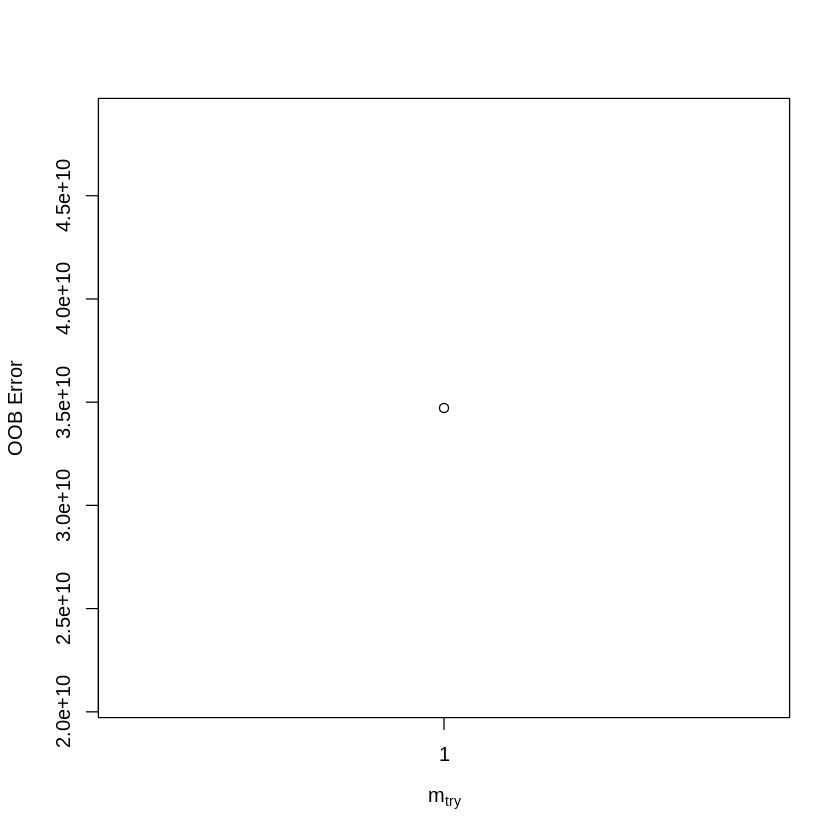

In [ ]:
# Assuming 'aggregated_data' is your dataframe and 'avg_price' is what you're trying to predict
# Also assuming all other variables are factors or numeric as required

# Tune the mtry parameter
tune_result <- tuneRF(aggregated_data[, c("property_type", "county", "deed_year", "estate_type", "new_build")],
                      aggregated_data$average_price,
                      ntreeTry = 500,
                      stepFactor = 1.5,
                      improve = 0.01,
                      trace = TRUE,
                      plot = TRUE)

# Print the result
print(tune_result)

In [ ]:
# Assuming the optimal mtry is where the OOB error is minimized
optimal_mtry <- tune_result[which.min(tune_result[, 2]), 1]

In [ ]:
# Fit the model with the optimal mtry
rf_model_tuned <- randomForest(average_price ~ property_type + county + deed_year + estate_type + new_build,
                               data = aggregated_data,
                               mtry = optimal_mtry,
                               ntree = 500)

In [ ]:
# Print model summary
print(rf_model_tuned)

# Check importance of features
importance(rf_model_tuned)


Call:
 randomForest(formula = average_price ~ property_type + county +      deed_year + estate_type + new_build, data = aggregated_data,      mtry = optimal_mtry, ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 1

          Mean of squared residuals: 34978682947
                    % Var explained: 27.16


,IncNodePurity
property_type,9.104716e+14
county,1.051185e+15
deed_year,1.483784e+14
estate_type,5.547358e+14
new_build,2.944312e+13


In [ ]:
# Predict on a test set or use cross-validation if you have a separate test set
# Example with cross-validation using caret
library(caret)
set.seed(123)  # for reproducibility
train_control <- trainControl(method = "cv", number = 10)
cv_model <- train(avg_price ~ property_type + county + deed_year + estate_type + new_build,
                  data = aggregated_data,
                  method = "rf",
                  trControl = train_control,
                  tuneGrid = data.frame(mtry = optimal_mtry))

# Print cross-validation results
print(cv_model)

In [ ]:
install.packages("gbm")
library(gbm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loaded gbm 2.2.2

This version of gbm is no longer under development. Consider transitioning to gbm3, https://github.com/gbm-developers/gbm3



In [ ]:

# Convert 'county' to factor if it's not already
aggregated_data$county <- as.factor(aggregated_data$county)
# Convert 'new_postcode' to factor
aggregated_data$new_postcode <- as.factor(aggregated_data$new_postcode)

In [ ]:
# Check the class of each variable
str(aggregated_data)

gropd_df [302,364 × 8] (S3: grouped_df/tbl_df/tbl/data.frame)
 $ county       : chr [1:302364] "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" ...
 $ deed_year    : num [1:302364] 2013 2013 2013 2013 2013 ...
 $ property_type: Factor w/ 5 levels "DETACHED","FLAT/MAISONETTE",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ estate_type  : Factor w/ 2 levels "FREEHOLD","LEASEHOLD": 1 1 1 1 1 1 1 1 1 1 ...
 $ new_build    : Factor w/ 2 levels "NO","YES": 1 1 1 1 1 1 1 1 2 2 ...
 $ Region       : Factor w/ 10 levels "East Midlands England",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ new_postcode : chr [1:302364] "BA1 " "BA2 " "BA3 " "BS14" ...
 $ average_price: num [1:302364] 612584 483595 264322 339786 375498 ...
 - attr(*, "groups")= tibble [20,732 × 7] (S3: tbl_df/tbl/data.frame)
  ..$ county       : chr [1:20732] "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" "BATH AND NORTH EAST SOMERSET" ...
  .

In [ ]:
install.packages("fastDummies")
library(fastDummies)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Convert categorical variables to dummy variables

df_encoded <- dummy_cols(df_final, select_columns = c("property_type", "new_build", "estate_type", "Region", "deed_year"), remove_first_dummy = TRUE)

# Remove the original categorical columns if not needed
df_encoded <- df_encoded[, !(names(df_encoded) %in% c("property_type", "new_build", "estate_type", "Region", "deed_year"))]

In [ ]:
install.packages("np")
library(np)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘cubature’, ‘quadprog’, ‘quantreg’


Nonparametric Kernel Methods for Mixed Datatypes (version 0.60-18)
[vignette("np_faq",package="np") provides answers to frequently asked questions]
[vignette("np",package="np") an overview]
[vignette("entropy_np",package="np") an overview of entropy-based methods]



In [ ]:
str(df_encoded)

tibble [10,804,854 × 40] (S3: tbl_df/tbl/data.frame)
 $ unique_id                              : chr [1:10804854] "{14C264CE-A450-4424-B2FC-59BCB8673F31}" "{CF1B07BD-6D42-41A1-A7E2-52A23BFD3DF1}" "{B9B46180-204A-43BE-847C-52A25E2593F1}" "{260A3CB9-EFDD-4D5D-B626-562F93B5FF86}" ...
 $ price_paid                             : num [1:10804854] 150000 230000 182000 185000 265000 ...
 $ deed_date                              : POSIXct[1:10804854], format: "2013-12-20" "2013-07-05" ...
 $ postcode                               : chr [1:10804854] "PE7 2PP" "EN9 3ED" "ST7 2BH" "LE9 6QP" ...
 $ street                                 : chr [1:10804854] "WHITTLESEY ROAD" "CULLINGS COURT" "STANLEY COURT" "MERTON CLOSE" ...
 $ locality                               : chr [1:10804854] NA NA "ALSAGER" "BROUGHTON ASTLEY" ...
 $ town                                   : chr [1:10804854] "PETERBOROUGH" "WALTHAM ABBEY" "STOKE-ON-TRENT" "LEICESTER" ...
 $ district                               : chr [1:108

In [ ]:
kruskal_property_type_FLAT/MAISONETTE <- kruskal.test(price_paid ~ property_type_FLAT/MAISONETTE, data = df_final)
kruskal_property_type_OTHER <- kruskal.test(price_paid ~ property_type_OTHER, data = df_final)
kruskal_property_type_SEMI-DETACHED <- kruskal.test(price_paid ~ property_type_SEMI-DETACHED, data = df_final)
kruskal_property_type_TERRACED <- kruskal.test(price_paid ~ property_type_TERRACED, data = df_final)
kruskal_new_build_YES <- kruskal.test(price_paid ~ new_build_YES, data = df_final)
kruskal_estate_type_LEASEHOLD <- kruskal.test(price_paid ~ estate_type_LEASEHOLD, data = df_final)
kruskal_Region_East of England <- kruskal.test(price_paid ~ Region_East of England, data = df_final)
kruskal_Region_London <- kruskal.test(price_paid ~ Region_London, data = df_final)
kruskal_Region_North East England <- kruskal.test(price_paid ~ Region_North East England, data = df_final)
kruskal_Region_North West England <- kruskal.test(price_paid ~ Region_North West England, data = df_final)
kruskal_Region_South East England <- kruskal.test(price_paid ~ Region_South East England, data = df_final)
kruskal_Region_South West England <- kruskal.test(price_paid ~ Region_South West England, data = df_final)
kruskal_Region_Wales <- kruskal.test(price_paid ~ Region_Wales, data = df_final)
kruskal_Region_West Midlands England <- kruskal.test(price_paid ~ Region_West Midlands England, data = df_final)
kruskal_Region_Yorkshire and The Humber England <- kruskal.test(price_paid ~ Region_Yorkshire and The Humber England, data = df_final)
kruskal_deed_year_2014 <- kruskal.test(price_paid ~ deed_year_2014, data = df_final)
kruskal_deed_year_2015 <- kruskal.test(price_paid ~ deed_year_2015, data = df_final)
kruskal_deed_year_2016 <- kruskal.test(price_paid ~ deed_year_2016, data = df_final)
kruskal_deed_year_2017 <- kruskal.test(price_paid ~ deed_year_2017, data = df_final)
kruskal_deed_year_2018 <- kruskal.test(price_paid ~ deed_year_2018, data = df_final)
kruskal_deed_year_2019 <- kruskal.test(price_paid ~ deed_year_2019, data = df_final)
kruskal_deed_year_2020 <- kruskal.test(price_paid ~ deed_year_2020, data = df_final)
kruskal_deed_year_2021 <- kruskal.test(price_paid ~ deed_year_2021, data = df_final)
kruskal_deed_year_2022 <- kruskal.test(price_paid ~ deed_year_2022, data = df_final)
kruskal_deed_year_2023 <- kruskal.test(price_paid ~ deed_year_2023, data = df_final)

In [ ]:
# List of variables to test
variables <- c("property_type", "new_build", "estate_type",
               "Region","deed_year")

# Performing the tests and storing results
results <- lapply(variables, function(var) {
  test <- kruskal.test(price_paid ~ get(var), data = df_final)
  return(data.frame(Variable = var,
                    Chi_Square = test$statistic,
                    df = test$parameter,
                    p_value = test$p.value))
})

# Combine results into a single data frame
results_df <- do.call(rbind, results)

# View results
print(results_df)

                                 Variable Chi_Square df p_value
Kruskal-Wallis chi-squared  property_type  1513431.8  4       0
Kruskal-Wallis chi-squared1     new_build   100960.6  1       0
Kruskal-Wallis chi-squared2   estate_type   185162.6  1       0
Kruskal-Wallis chi-squared3        Region  2935475.5  9       0
Kruskal-Wallis chi-squared4     deed_year   375415.0 10       0


In [ ]:
# Splitting Data

set.seed(123)  # for reproducibility
train_index <- sample(1:nrow(df_final), 0.6 * nrow(df_final))
train_data <- df_final[train_index, ]
test_data <- df_final[-train_index, ]

In [ ]:
install.packages("randomForest")
library(randomForest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:gridExtra’:

    combine


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin




In [ ]:
# Random Forest Model
rf_model <- randomForest(price_paid ~ property_type + Region + new_build + estate_type + deed_year, data = train_data, ntree = 500)
print(rf_model)